In [ ]:
import pandas as pd
df=pd.read_csv('Project_Phase1.csv')

In [ ]:
df.head()

,syn_error_rate,connection_time,destination_same_source_port_rate,destination_different_server_rate,connection_status,connection_count,destination_server_different_host_rate,suspicious_activity,protocol,server_different_host_rate,...,destination_server_reset_error_rate,server_reset_error_rate,server_syn_error_rate,destination_bytes,guest_login,authentication_status,destination_host_count,destination_reset_error_rate,different_server_rate,class
0,0.0,0,0.01,0.00,SF,2,0.0,2,tcp,0.0,...,0.01,0.0,0.0,8314,0,1,87,0.01,0.00,anomaly
1,1.0,0,0.00,0.07,S0,242,0.0,0,tcp,0.0,...,0.00,0.0,1.0,0,0,0,255,0.00,0.07,anomaly
2,1.0,0,0.00,0.08,S0,234,0.0,0,tcp,0.0,...,0.00,0.0,1.0,0,0,0,255,0.00,0.06,anomaly
3,1.0,0,0.00,0.08,S0,140,0.0,0,tcp,0.0,...,0.00,0.0,1.0,0,0,0,255,0.00,0.06,anomaly
4,1.0,0,0.00,0.07,S0,126,0.0,0,tcp,0.0,...,0.00,0.0,1.0,0,0,0,255,0.00,0.06,anomaly


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14036 entries, 0 to 14035
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   syn_error_rate                          14036 non-null  float64
 1   connection_time                         14036 non-null  int64  
 2   destination_same_source_port_rate       14036 non-null  float64
 3   destination_different_server_rate       14036 non-null  float64
 4   connection_status                       14036 non-null  object 
 5   connection_count                        14036 non-null  int64  
 6   destination_server_different_host_rate  14036 non-null  float64
 7   suspicious_activity                     14036 non-null  int64  
 8   protocol                                14036 non-null  object 
 9   server_different_host_rate              14036 non-null  float64
 10  destination_server_syn_error_rate       14036 non-null  fl

In [ ]:
# checking the missing values
missing_values=df.isnull().sum()
missing_values
# the dataset has no missing values (nulls)

,0
syn_error_rate,0
connection_time,0
destination_same_source_port_rate,0
destination_different_server_rate,0
connection_status,0
connection_count,0
destination_server_different_host_rate,0
suspicious_activity,0
protocol,0
server_different_host_rate,0


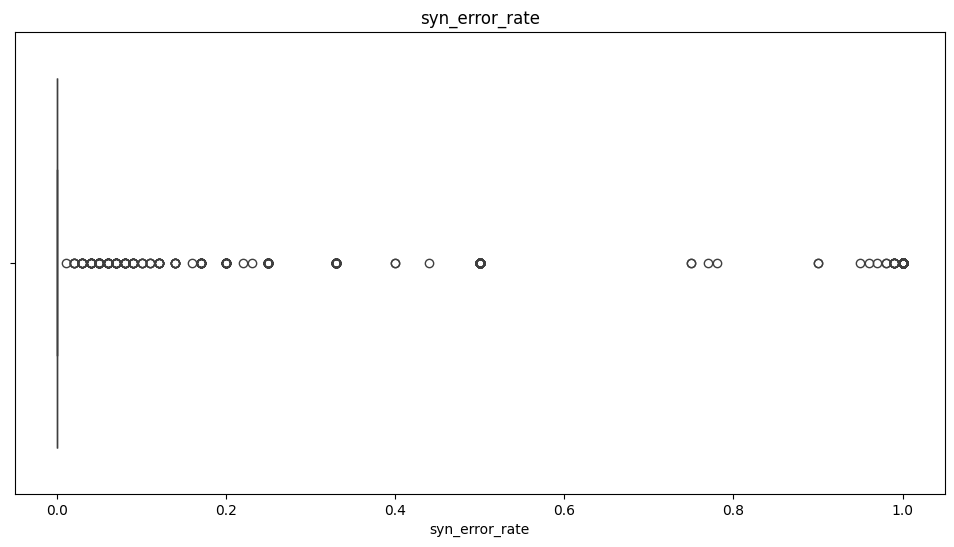

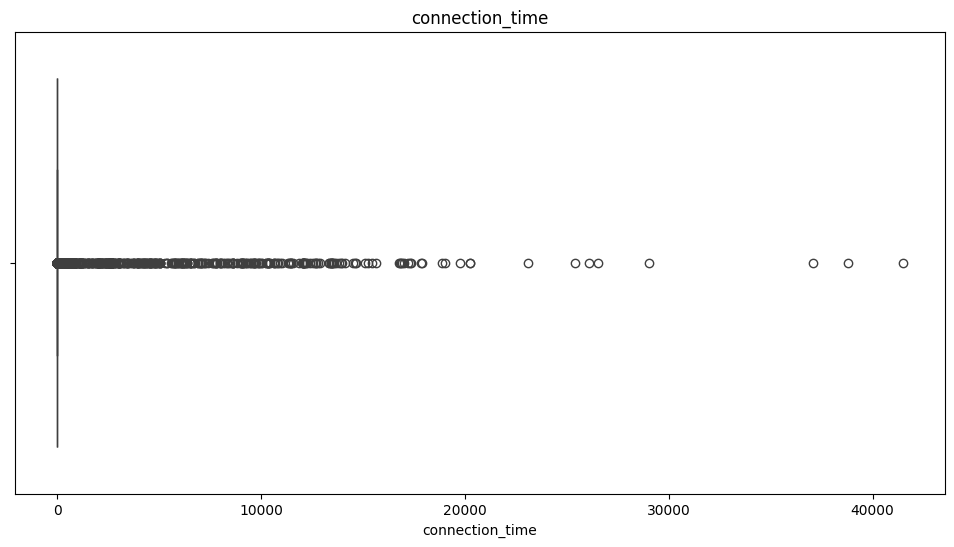

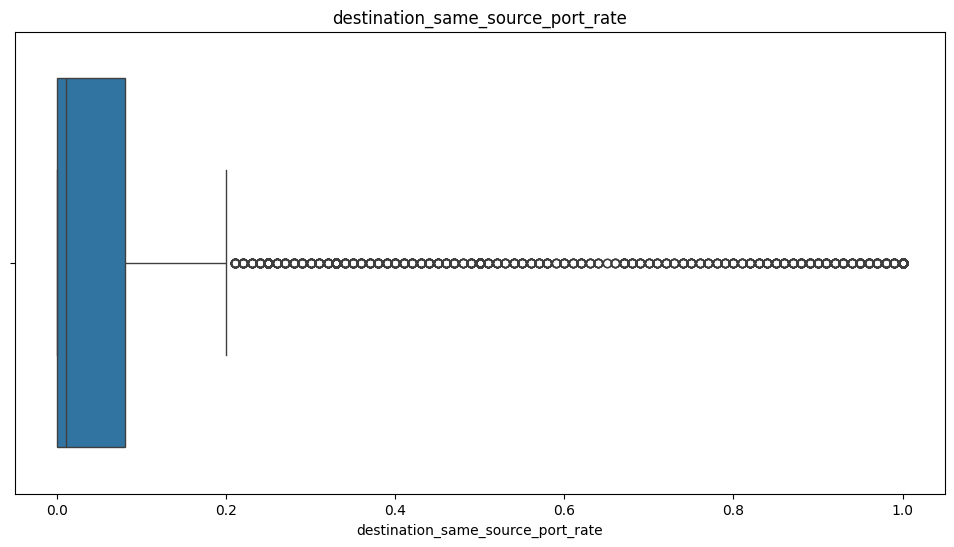

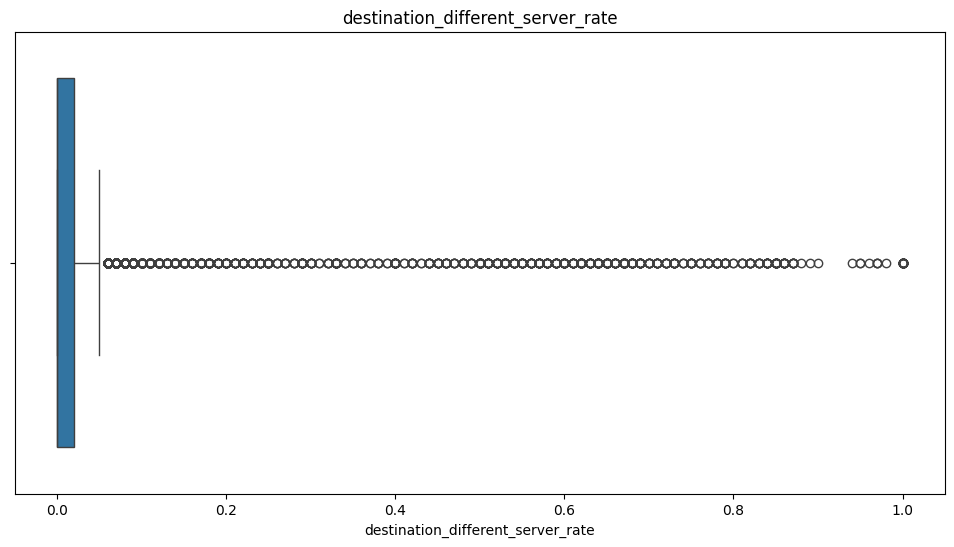

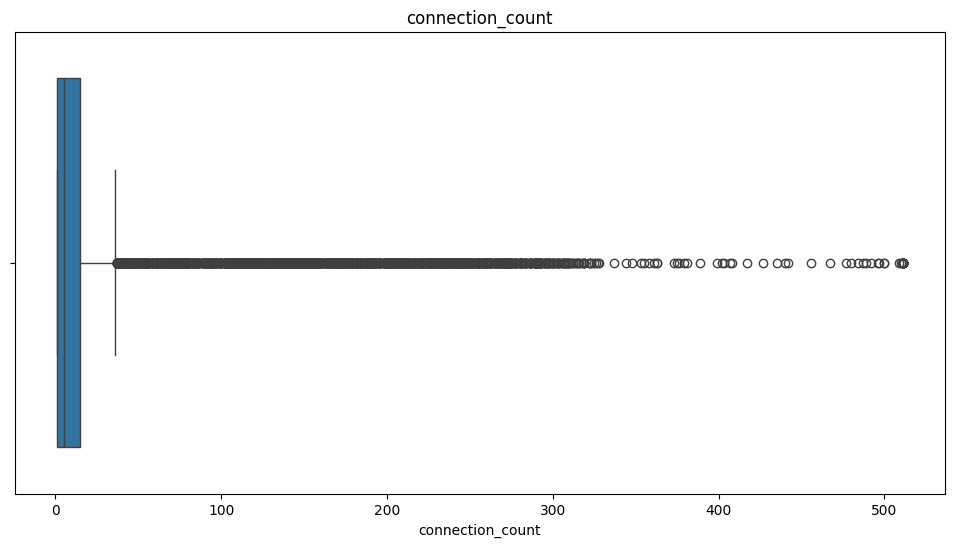

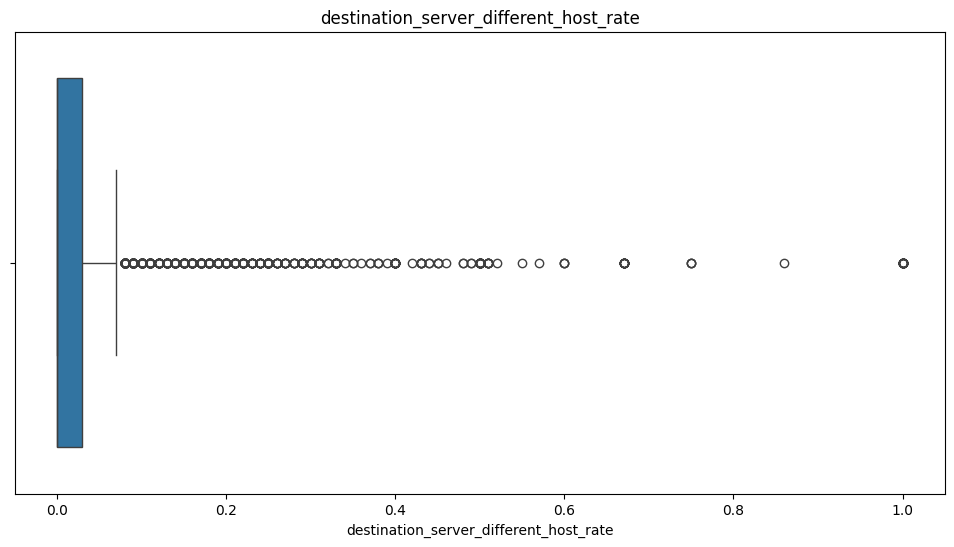

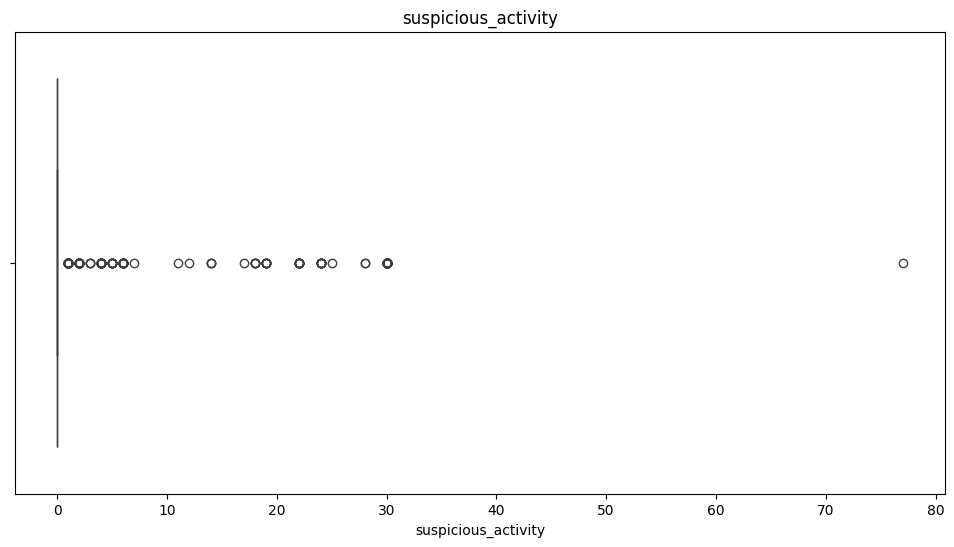

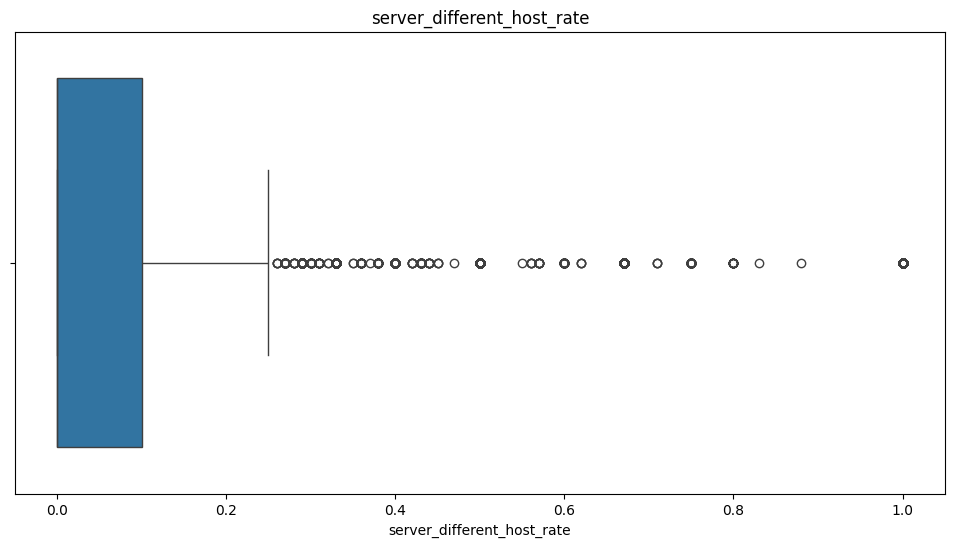

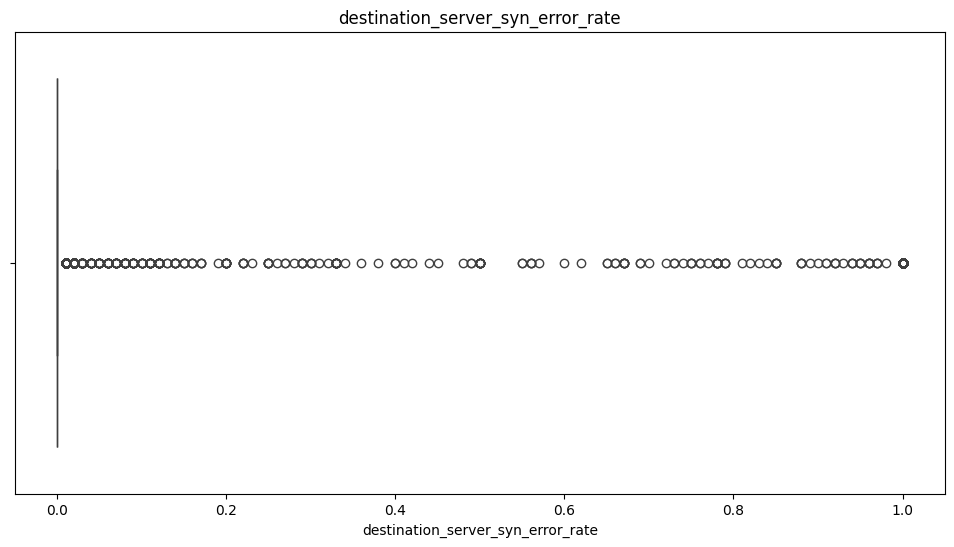

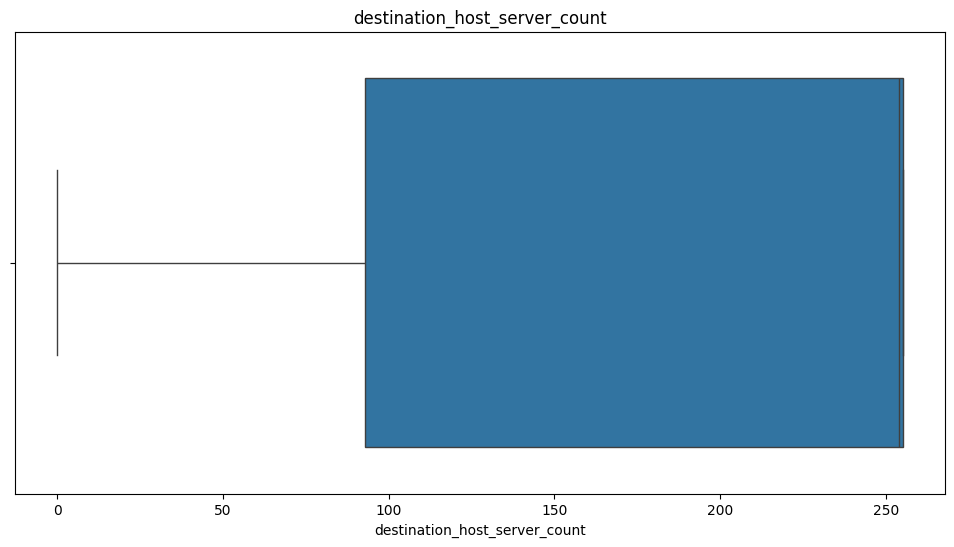

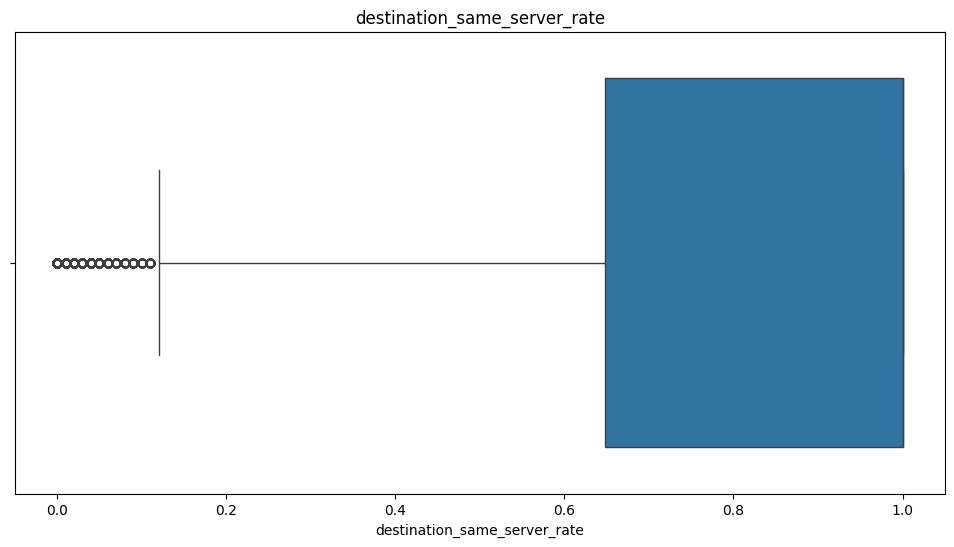

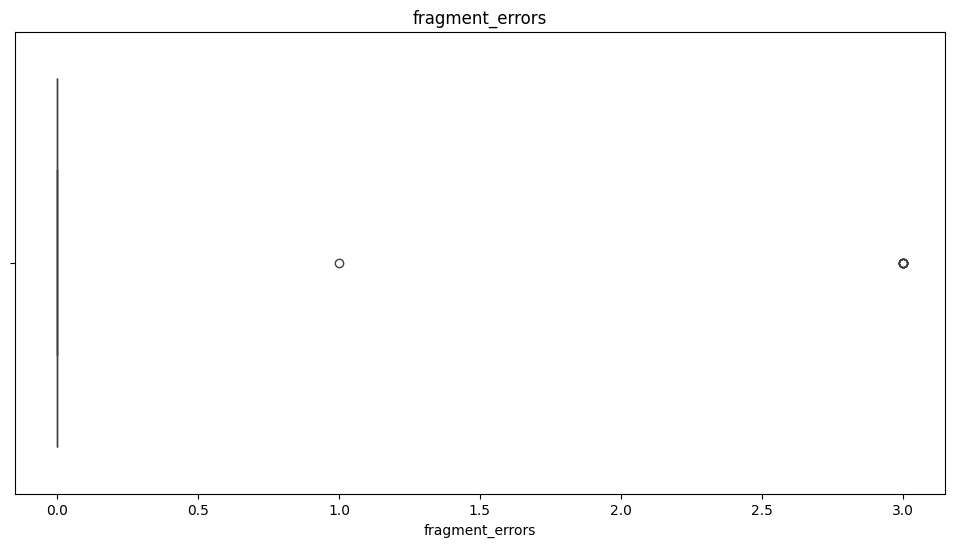

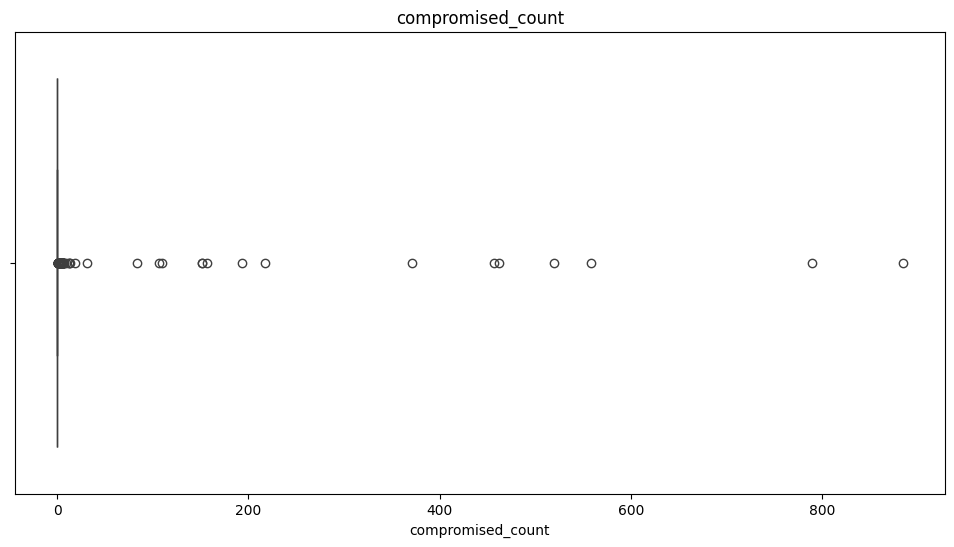

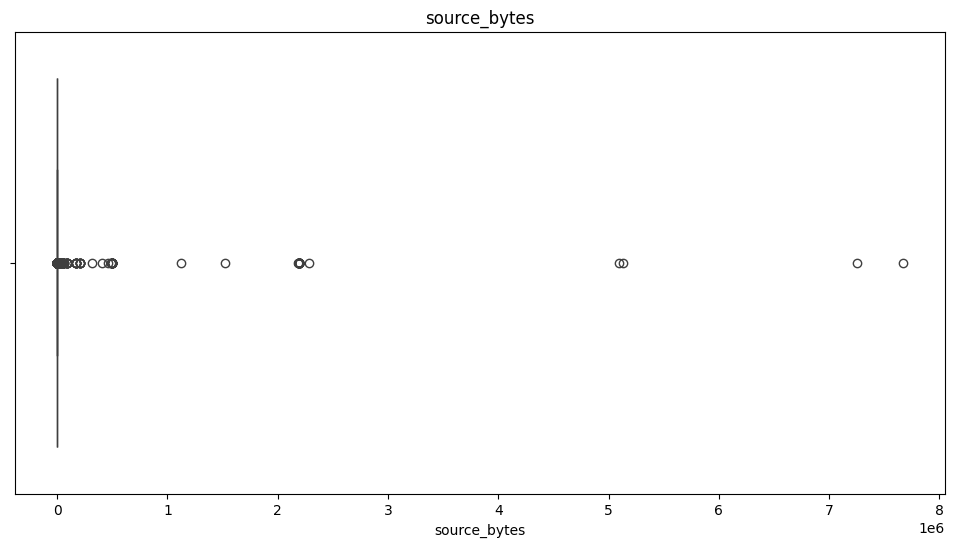

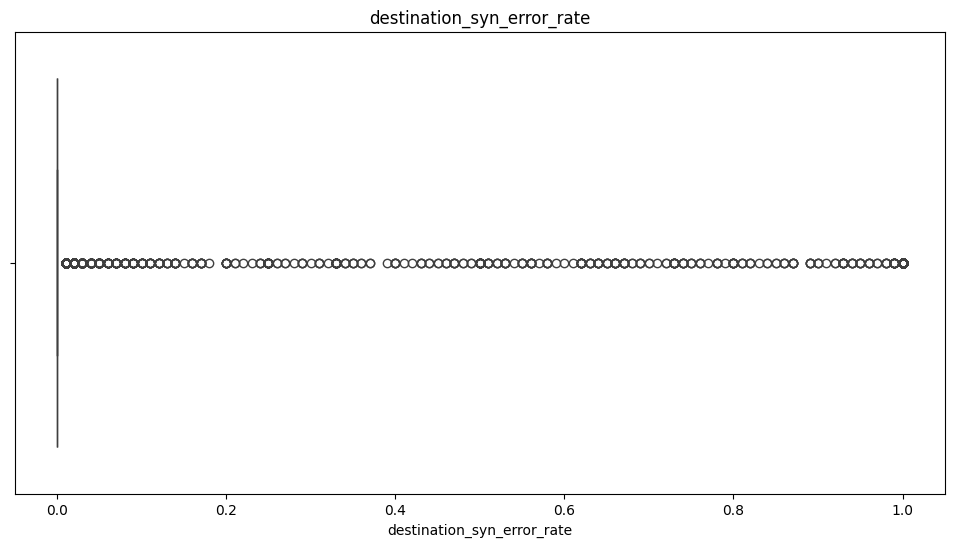

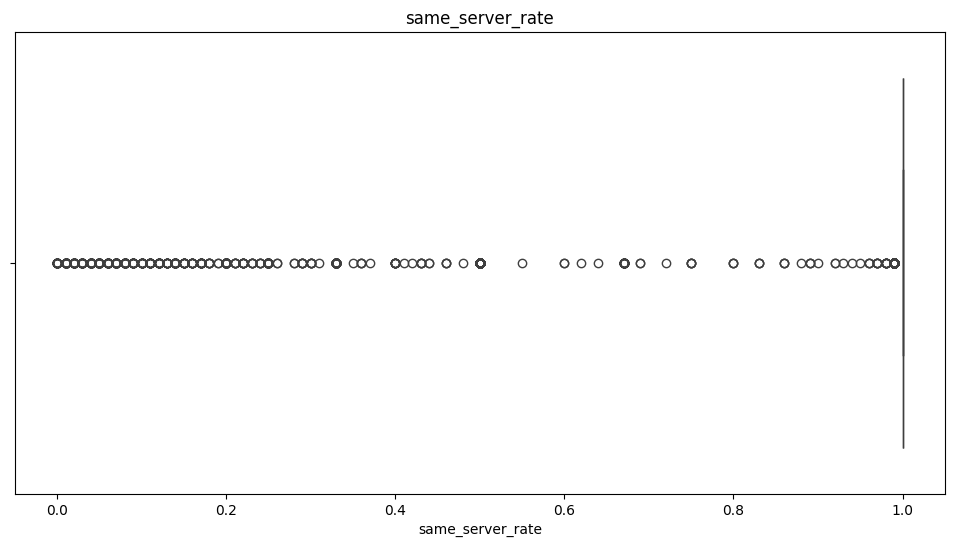

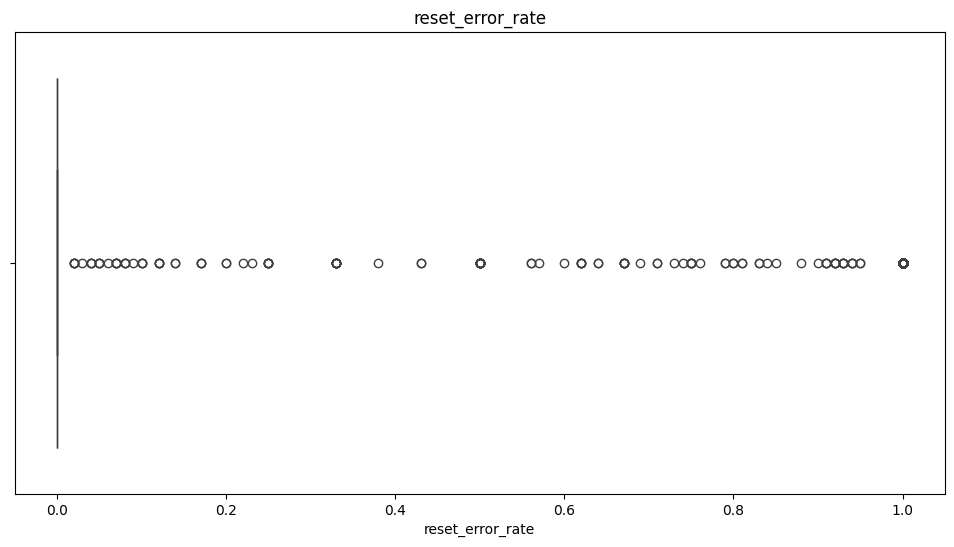

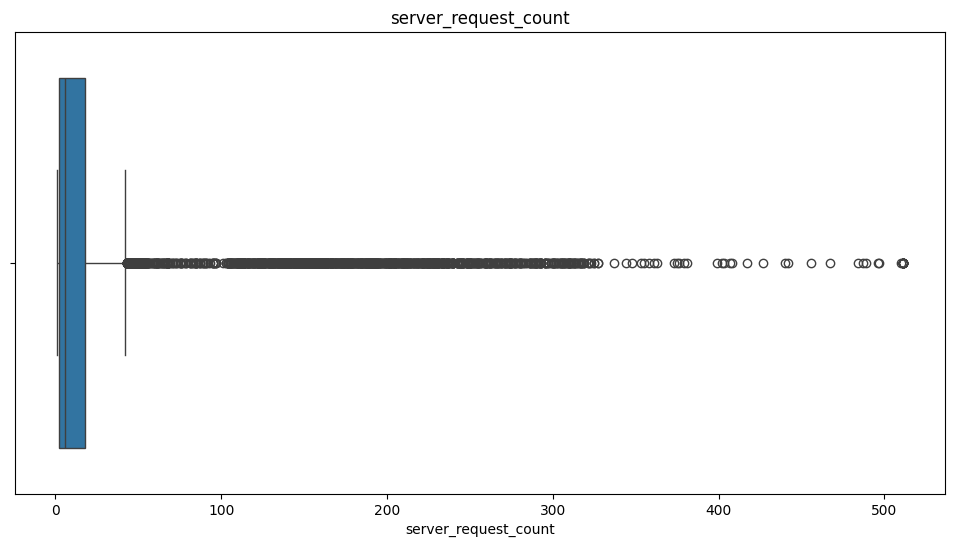

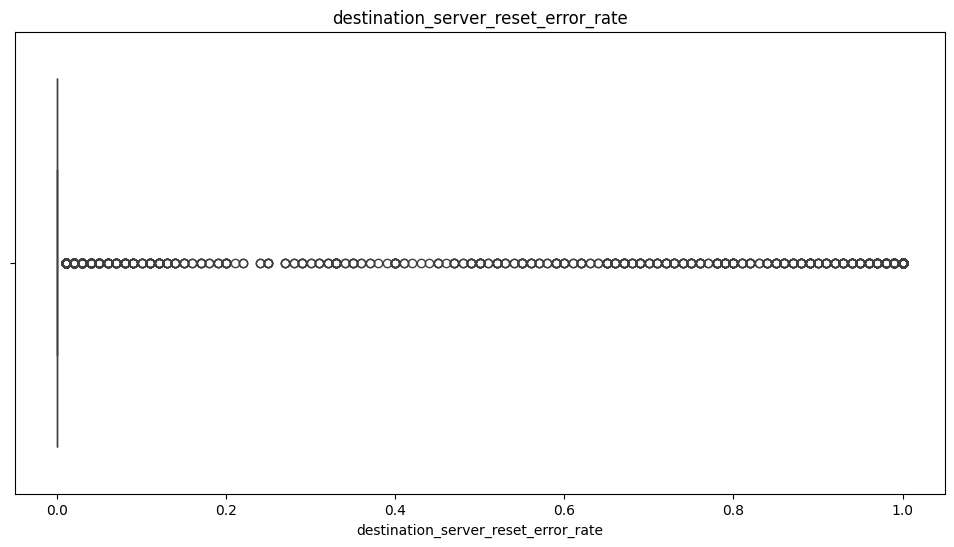

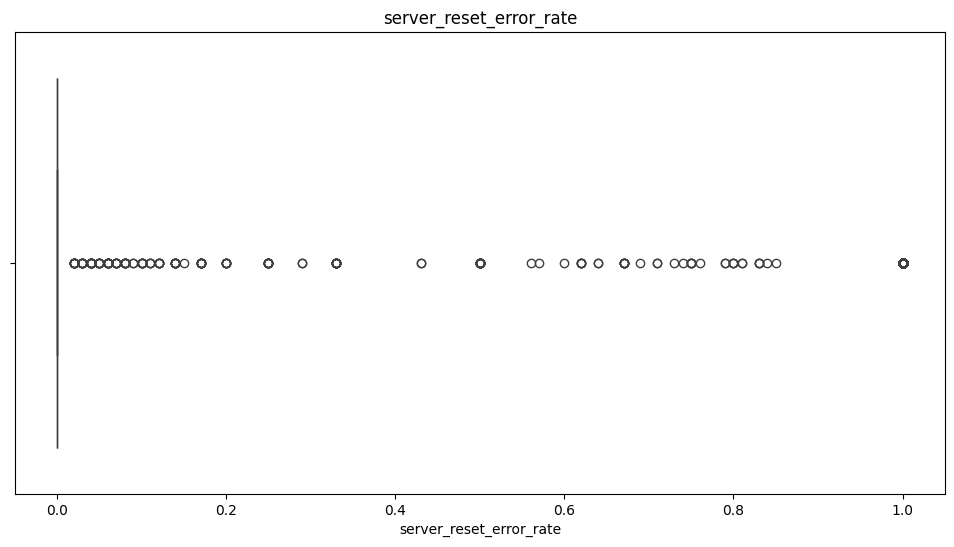

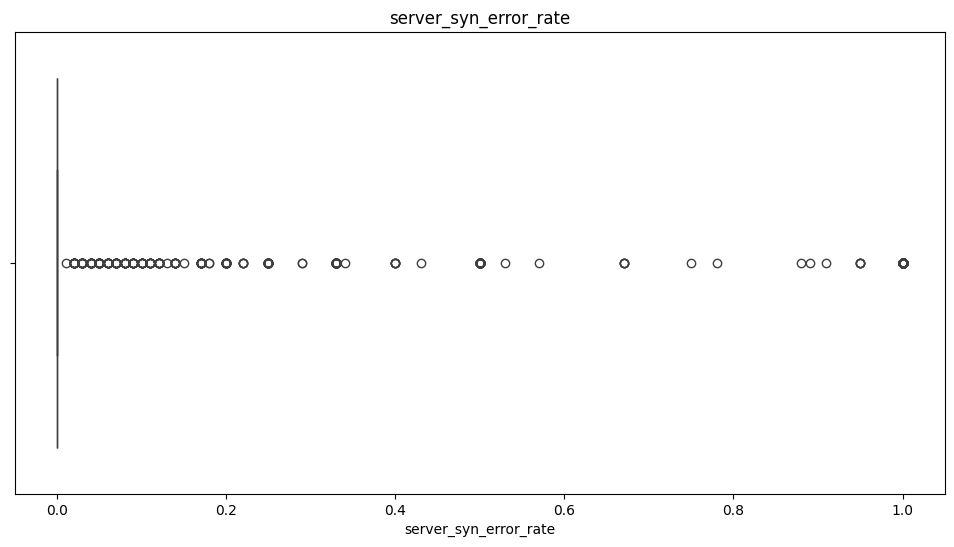

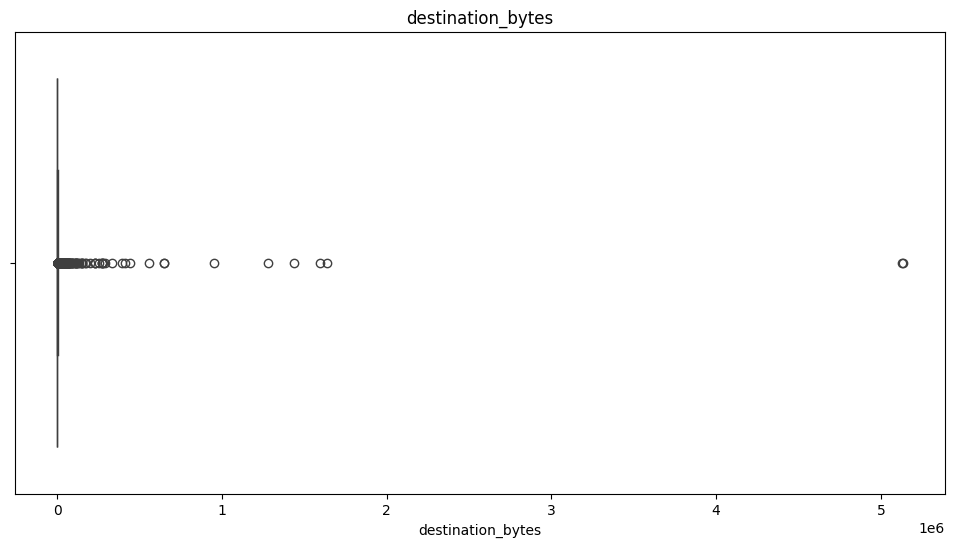

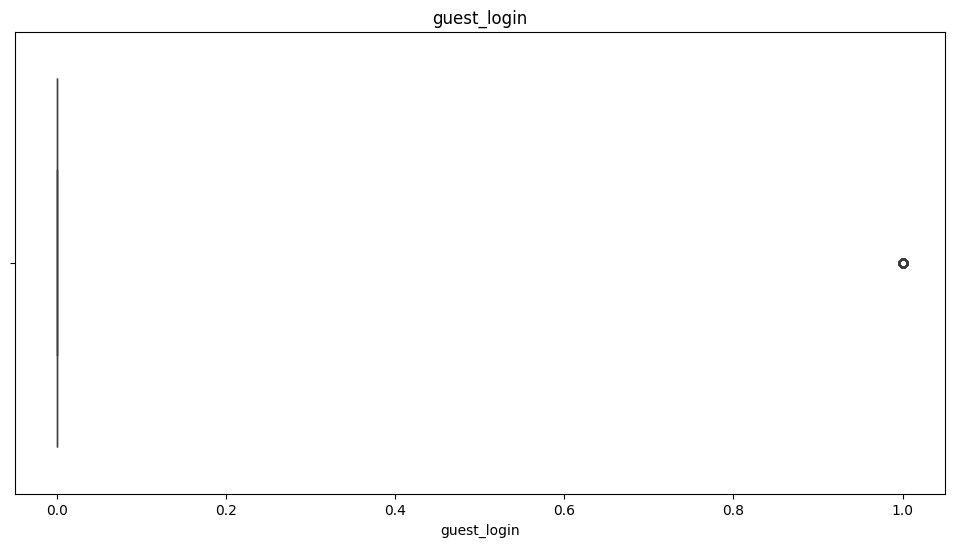

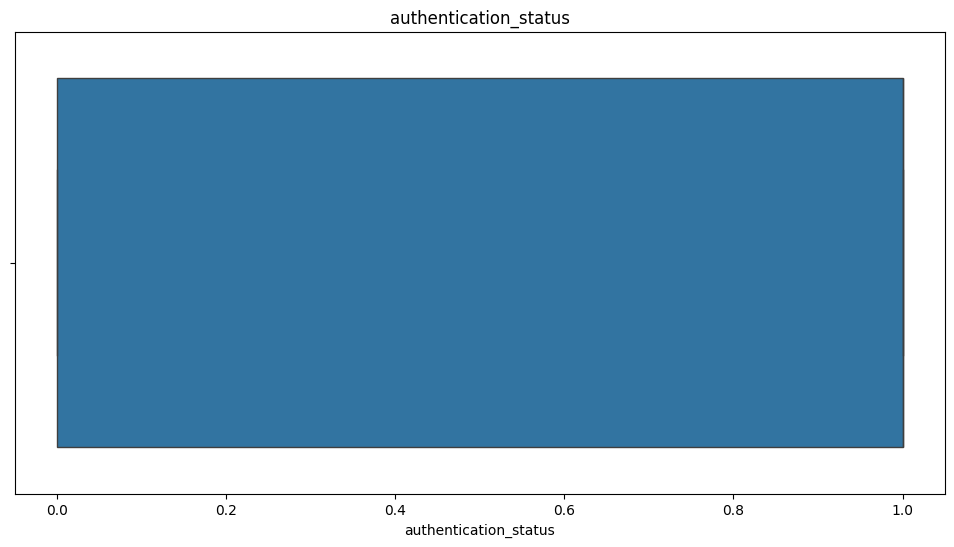

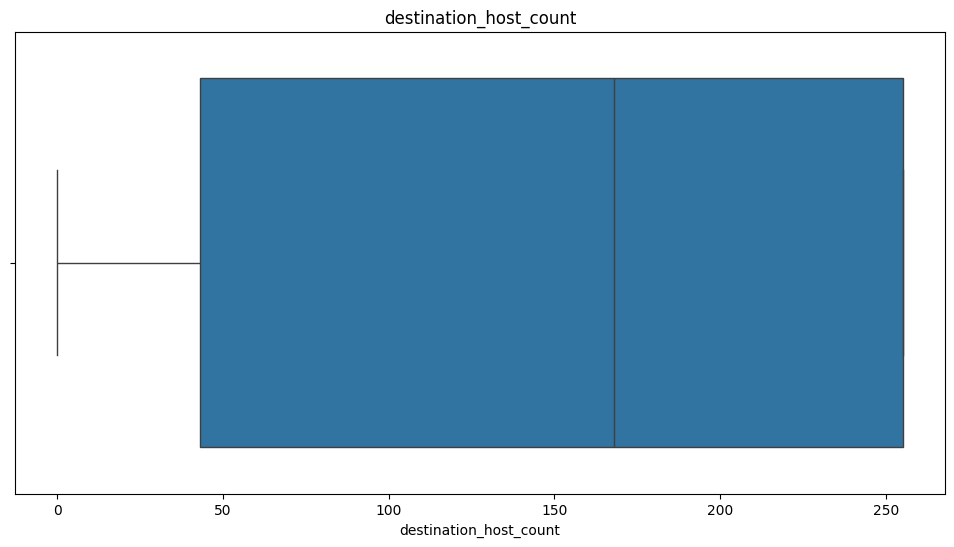

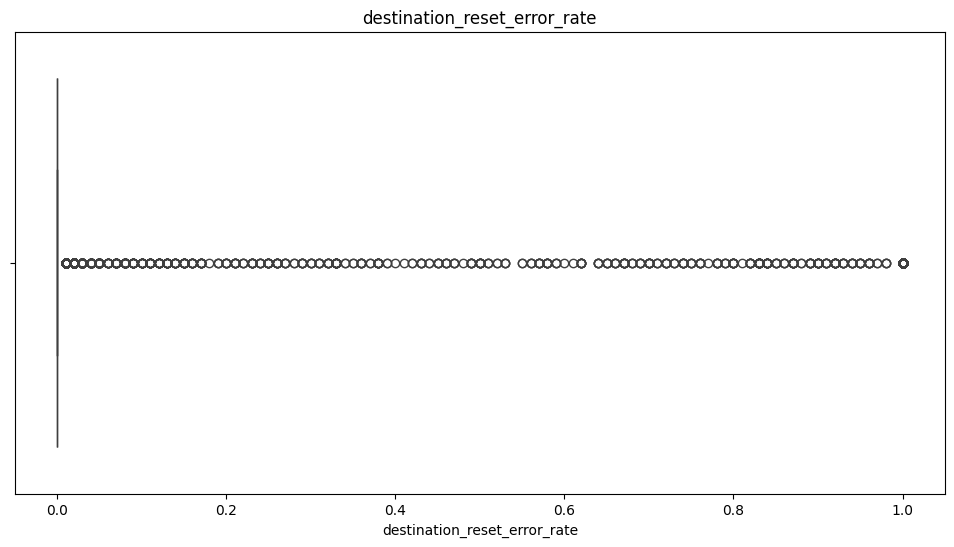

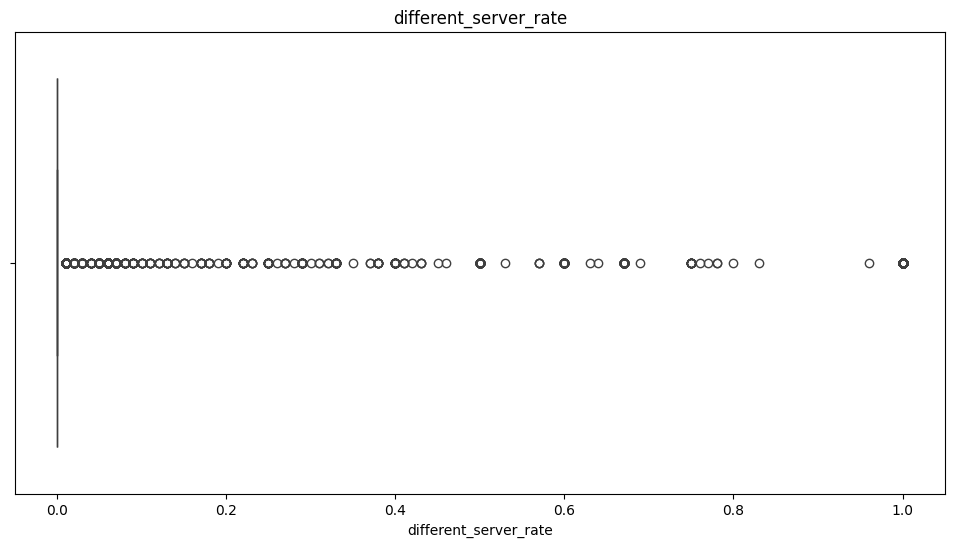

In [ ]:
# using box plots to identify the outliers in all numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
numerical_data=df.select_dtypes(include=['int64','float64'])
categorical_data=df.select_dtypes(include='object')
for column in numerical_data.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()
# dataset contains many outliers, so a robust scaler will be used to handle them

In [ ]:
# checking the unique values in all categorical columns to identify inconsistencies
for column in categorical_data:
    print(f"Unique values in '{column}':")
    print(df[column].unique(),'\n')
# the dataset has no inconsistencies

Unique values in 'connection_status':
['SF' 'S0' 'REJ' 'RSTO' 'RSTR' 'RSTOS0' 'S1' 'S3' 'S2' 'OTH'] 

Unique values in 'protocol':
['tcp' 'icmp' 'udp'] 

Unique values in 'service_type':
['http' 'link' 'bgp' 'ctf' 'iso_tsap' 'ecr_i' 'private' 'eco_i' 'ldap'
 'imap4' 'other' 'ftp' 'printer' 'http_443' 'kshell' 'echo' 'courier'
 'mtp' 'klogin' 'sunrpc' 'daytime' 'auth' 'vmnet' 'time' 'netbios_dgm'
 'systat' 'rje' 'ftp_data' 'telnet' 'Z39_50' 'supdup' 'discard' 'domain'
 'nntp' 'csnet_ns' 'finger' 'gopher' 'exec' 'uucp_path' 'login' 'nnsp'
 'hostnames' 'remote_job' 'netstat' 'efs' 'sql_net' 'pop_3' 'X11' 'whois'
 'ssh' 'uucp' 'pop_2' 'name' 'smtp' 'netbios_ssn' 'domain_u' 'urp_i'
 'ntp_u' 'shell' 'IRC' 'red_i' 'urh_i'] 

Unique values in 'class':
['anomaly' 'normal'] 



In [ ]:
# removing duplicated rows
df=df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

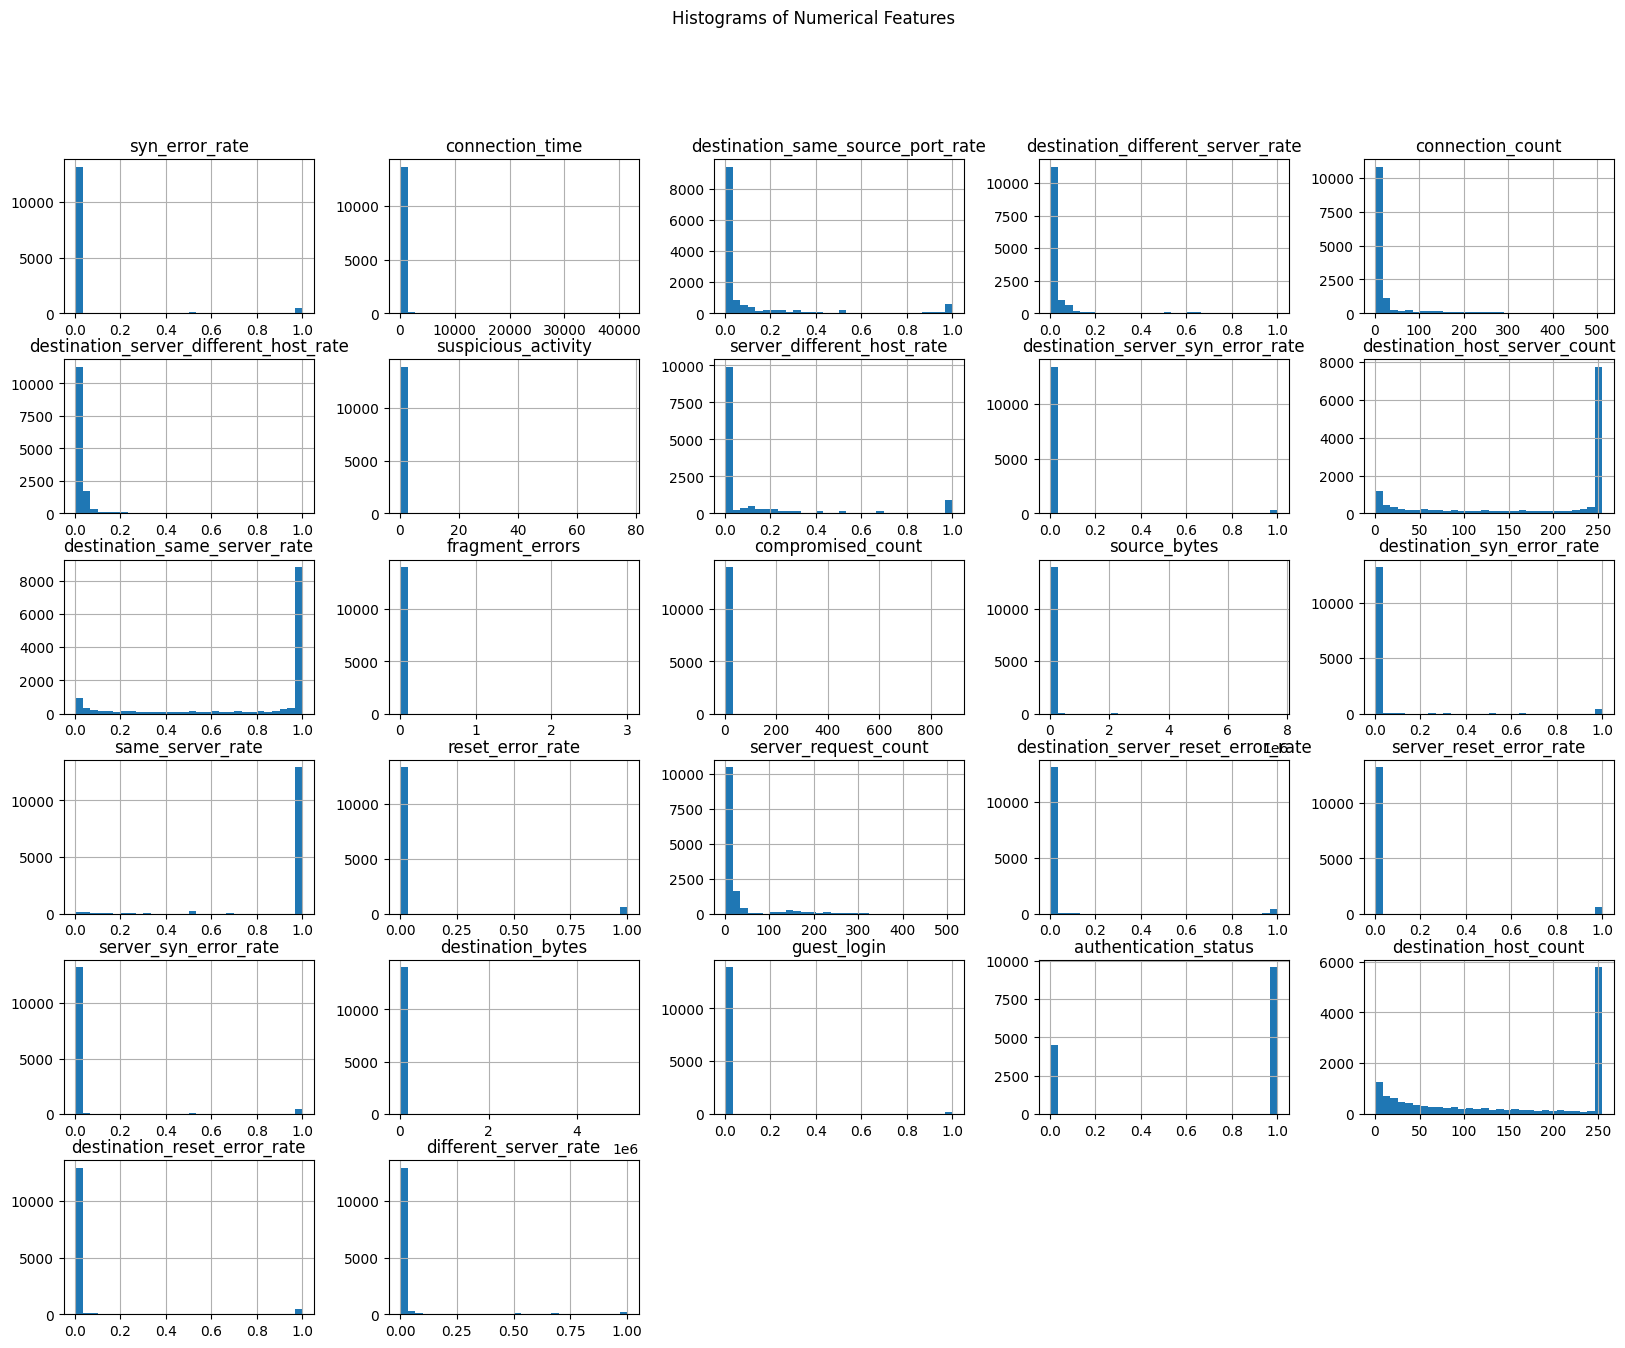

In [ ]:
# using histograms to visualize relationships in all numerical columns
numerical_data.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of Numerical Features")
plt.show()

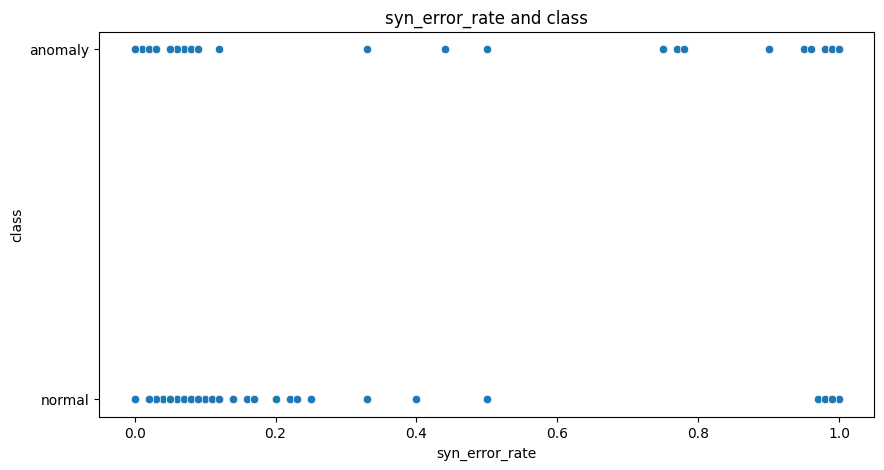

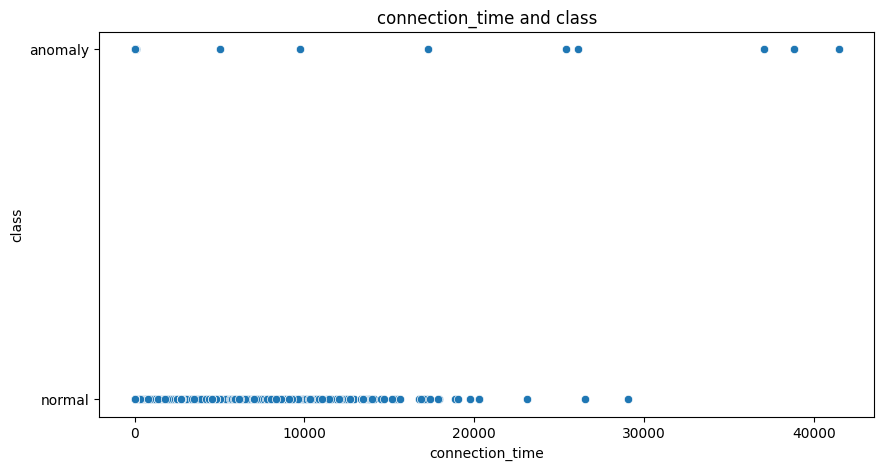

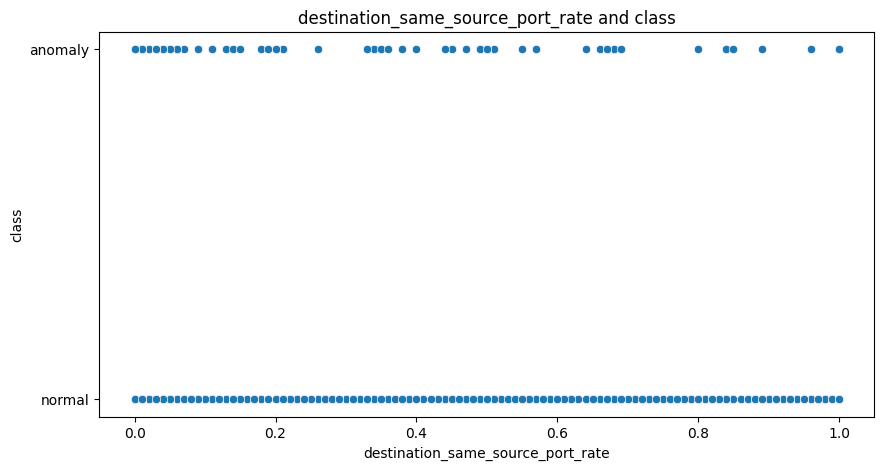

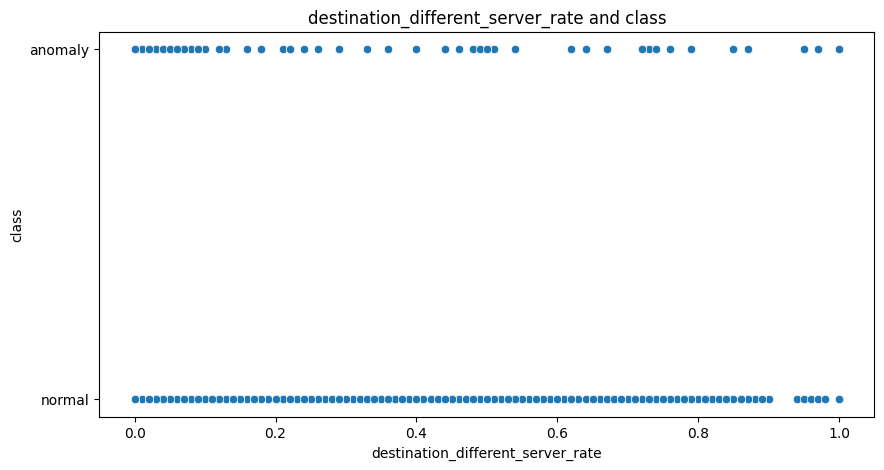

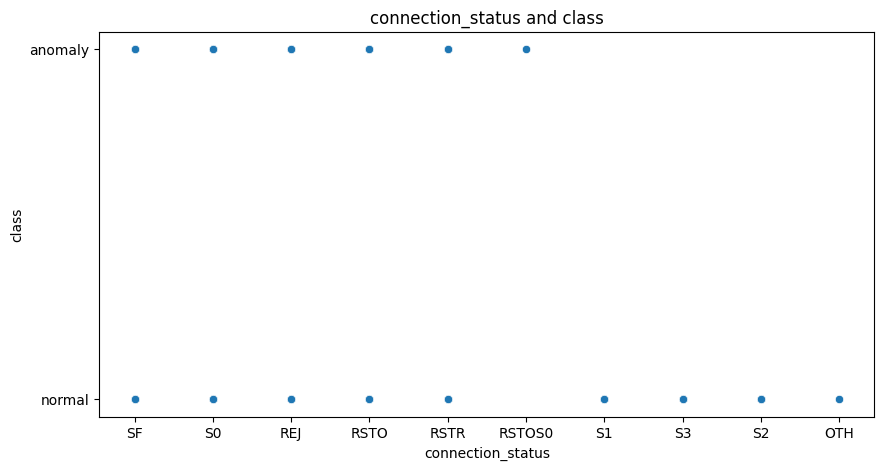

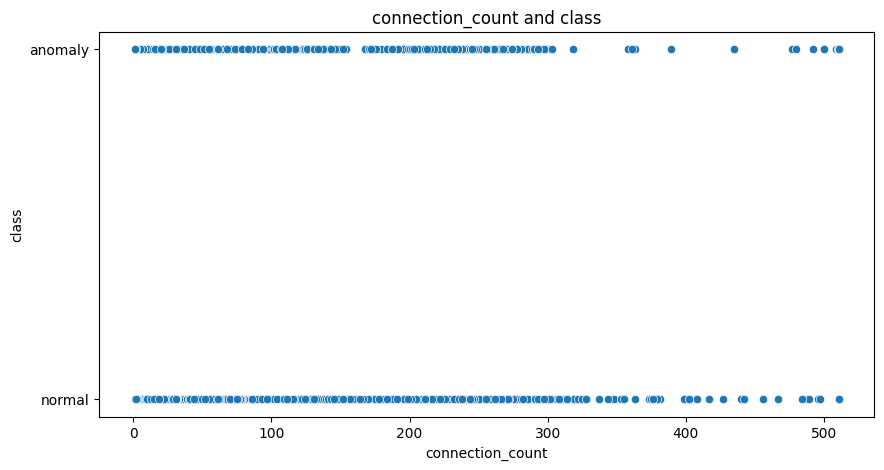

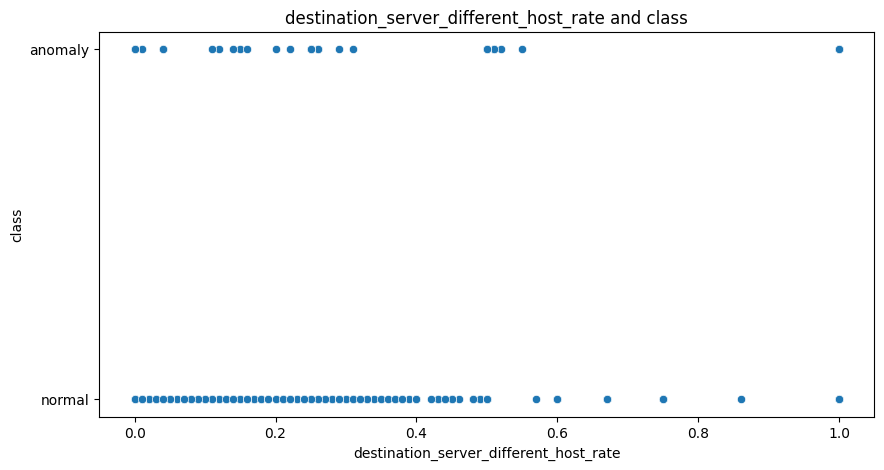

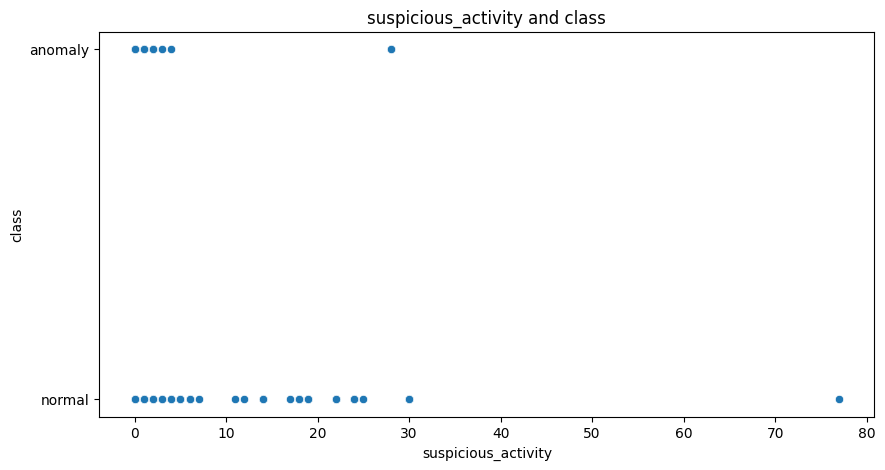

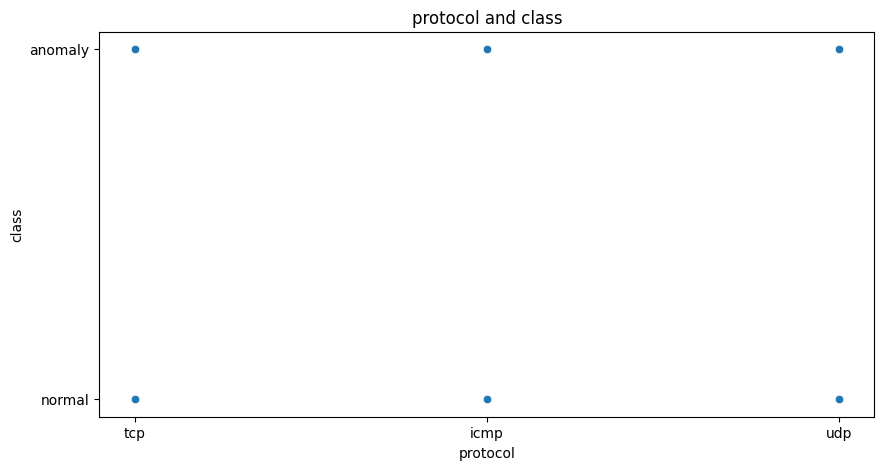

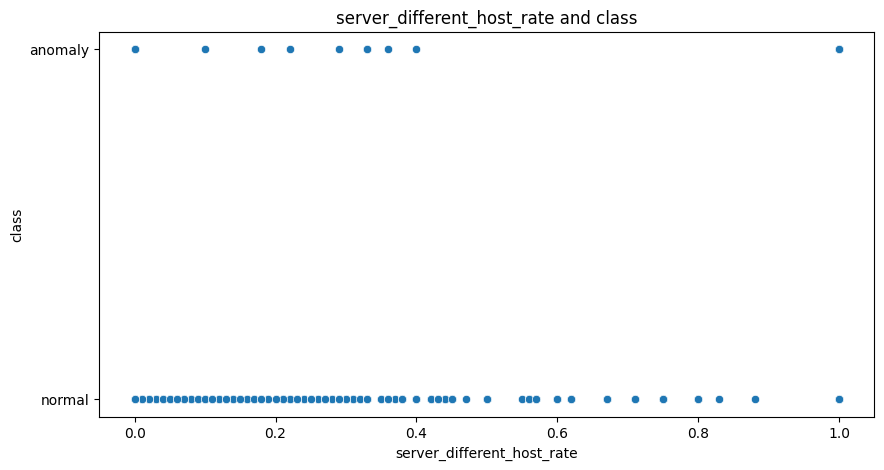

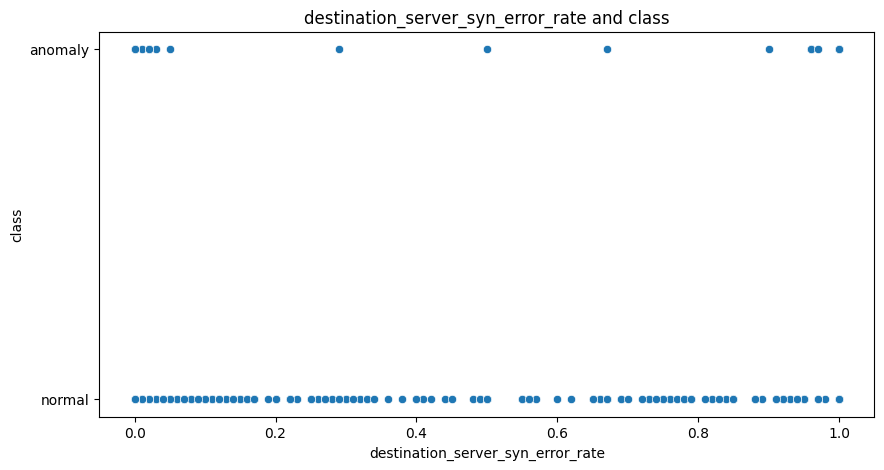

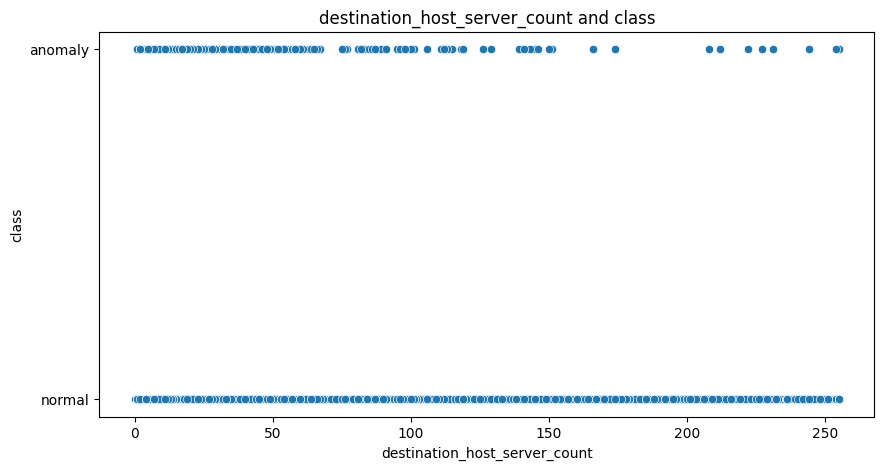

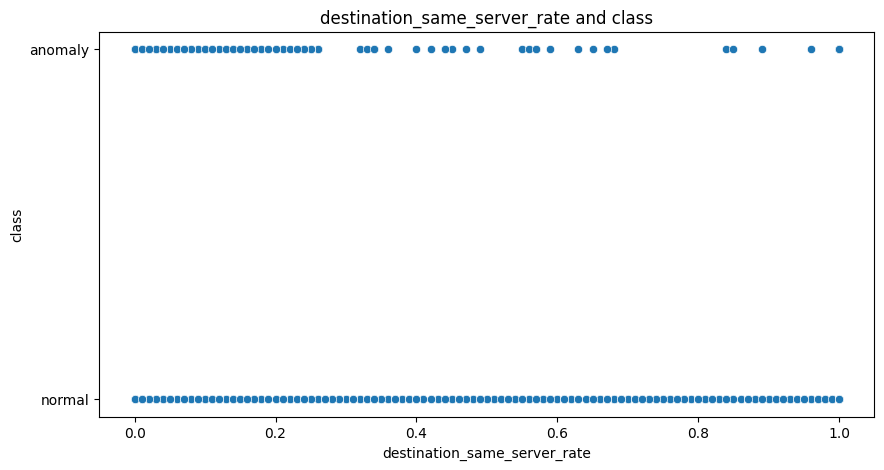

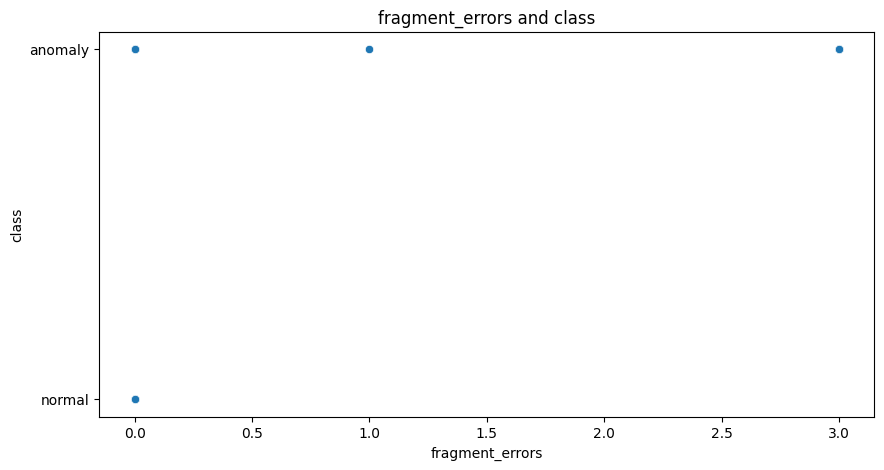

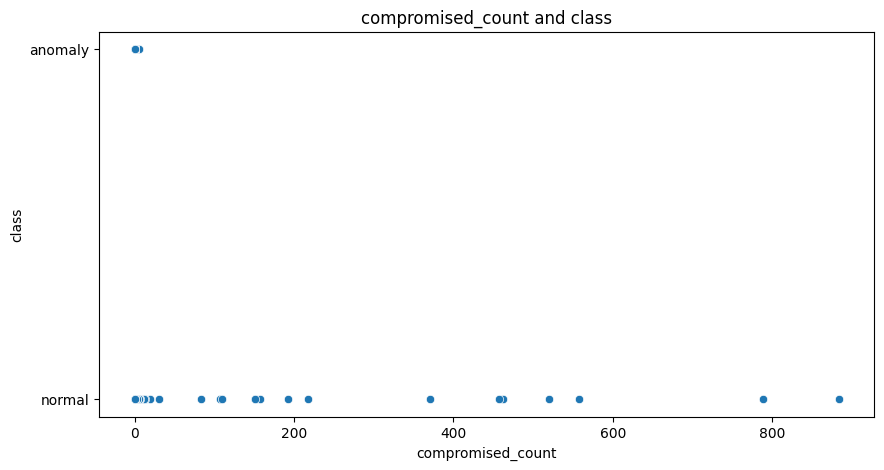

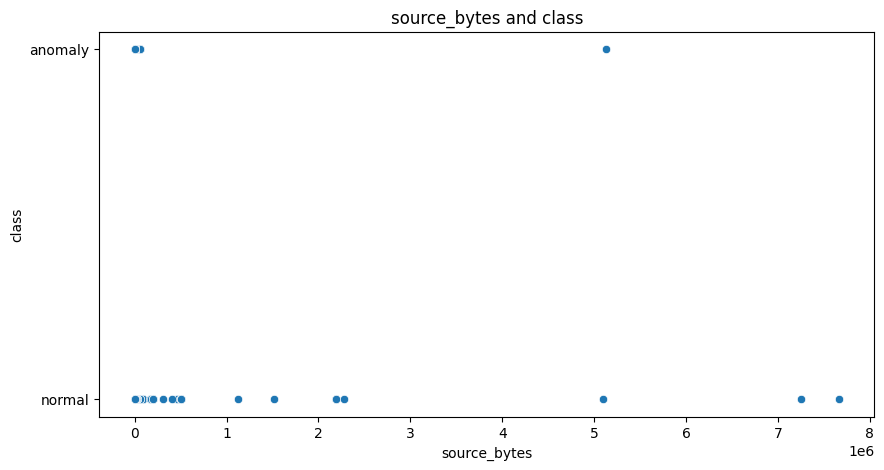

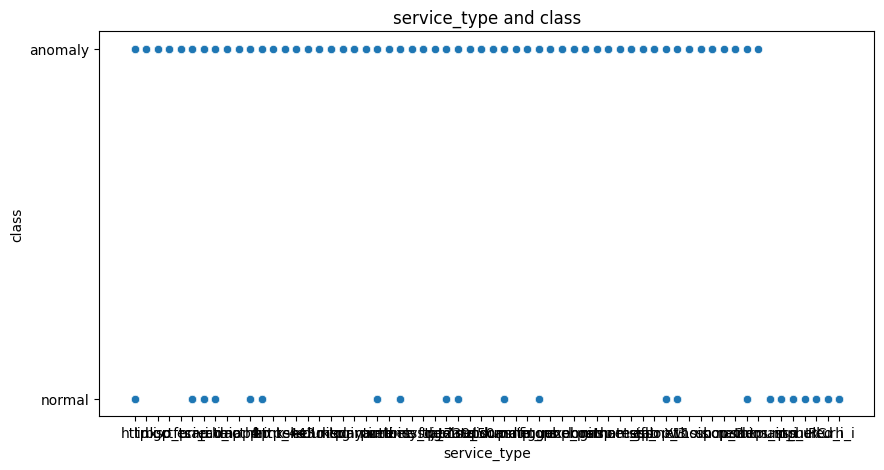

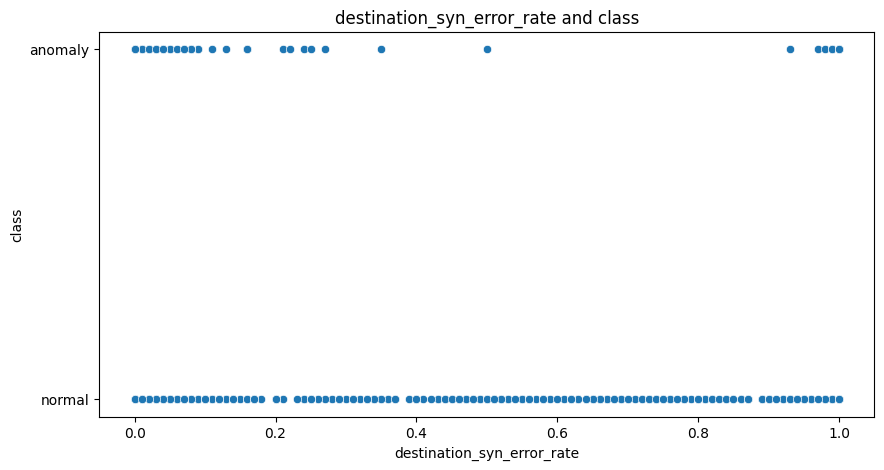

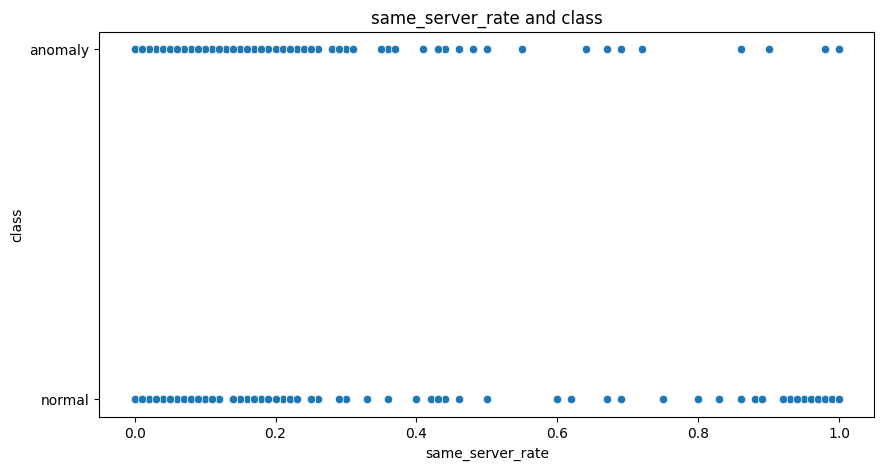

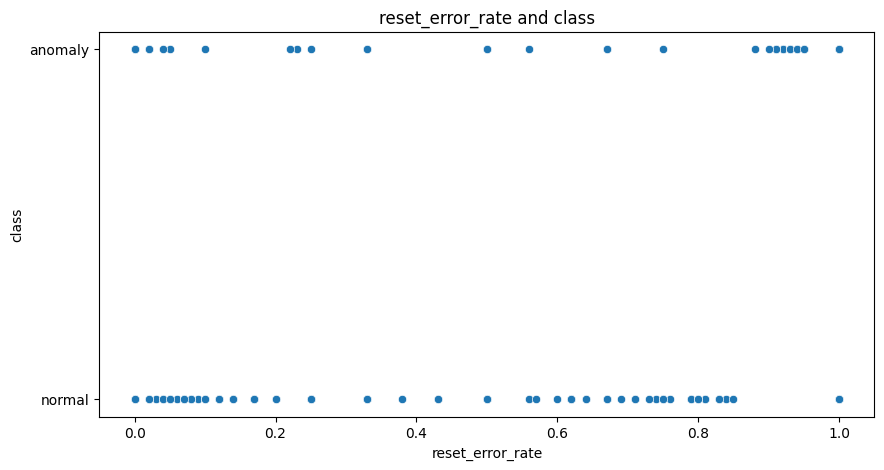

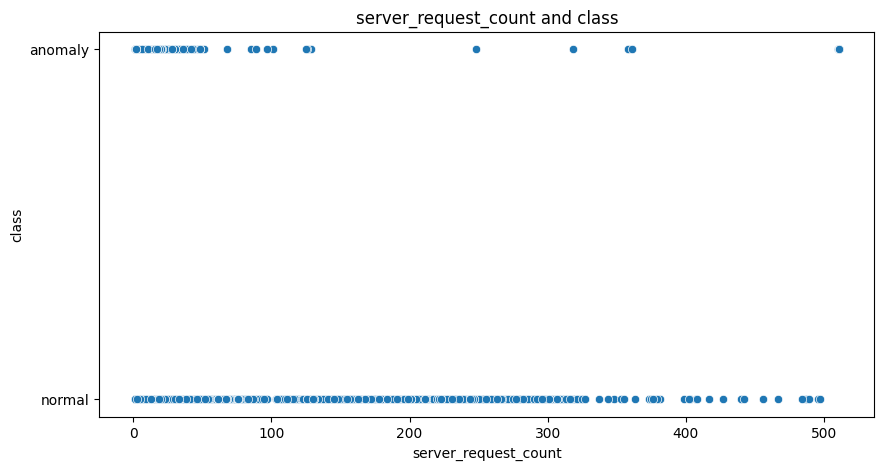

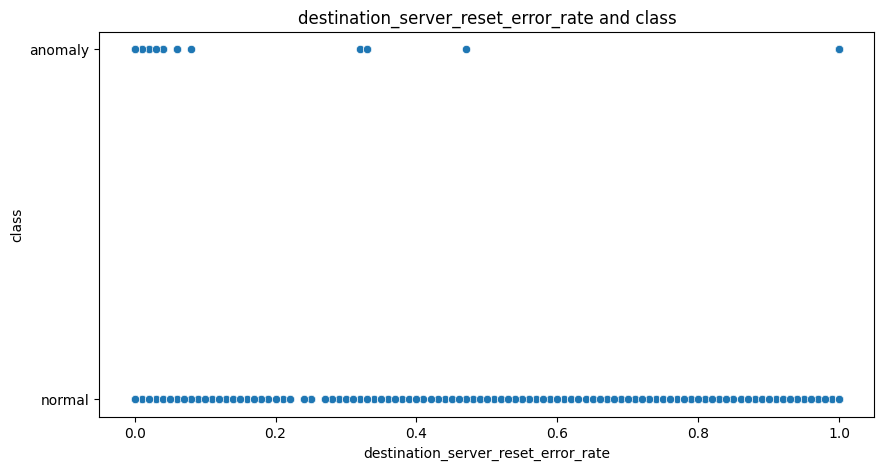

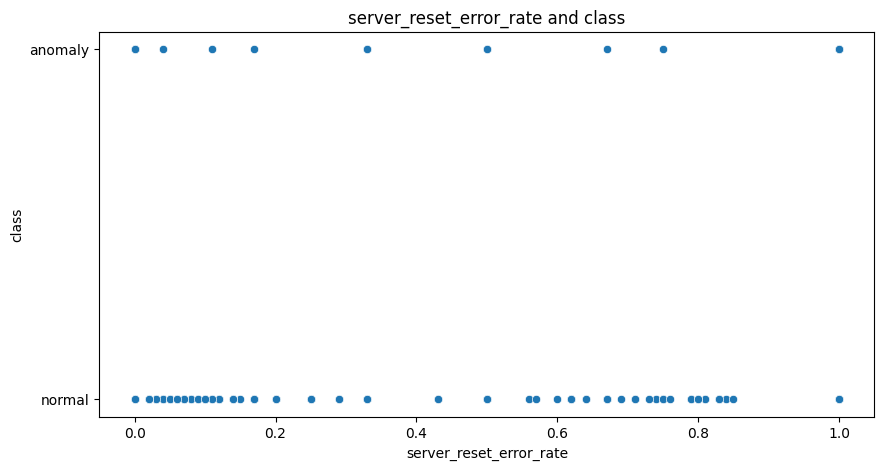

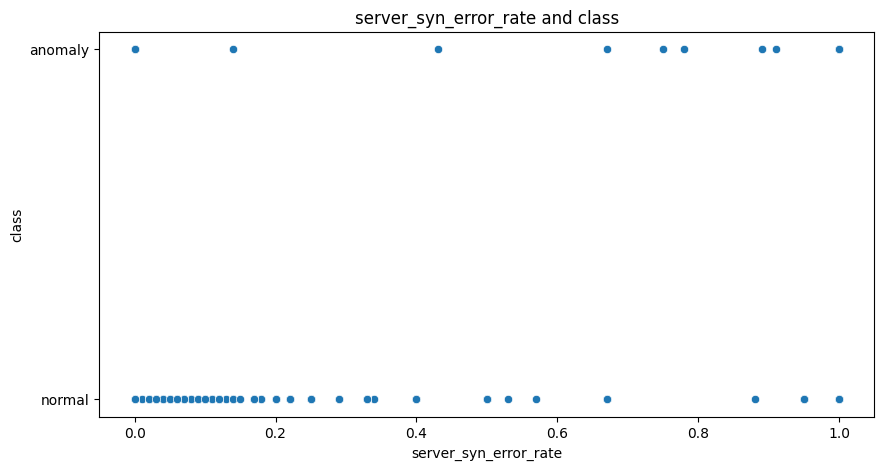

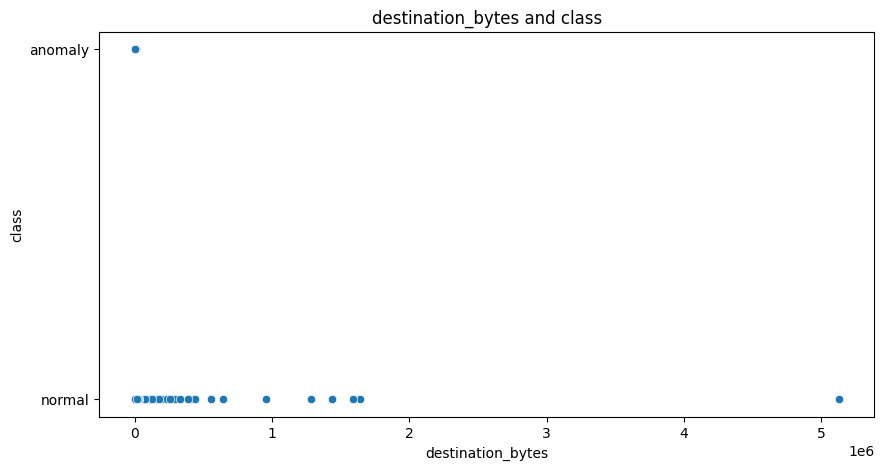

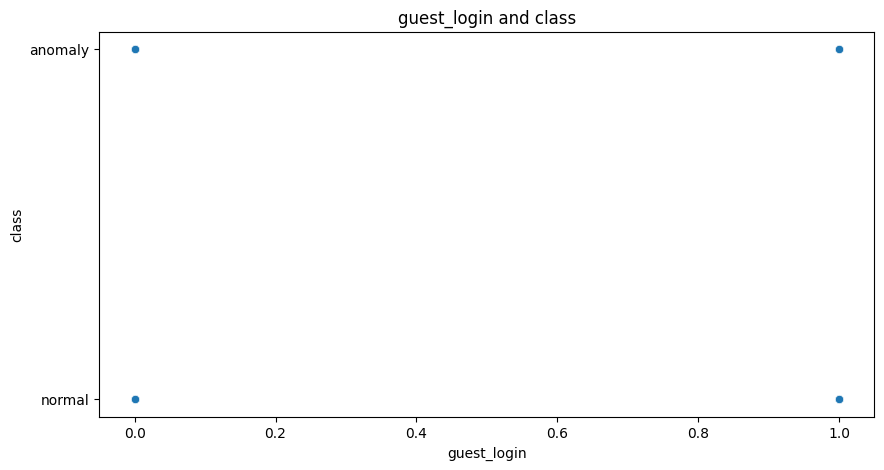

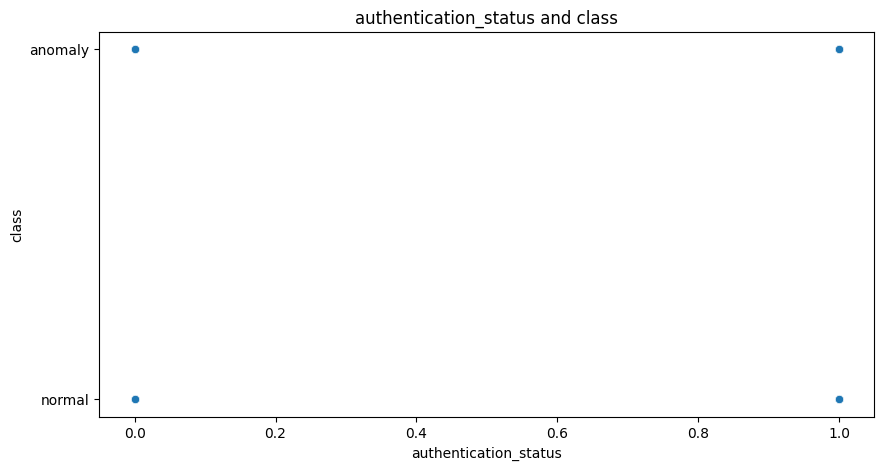

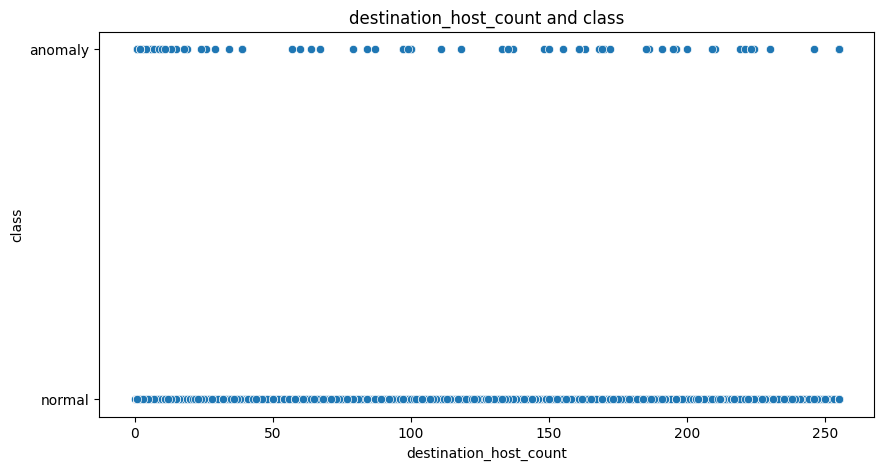

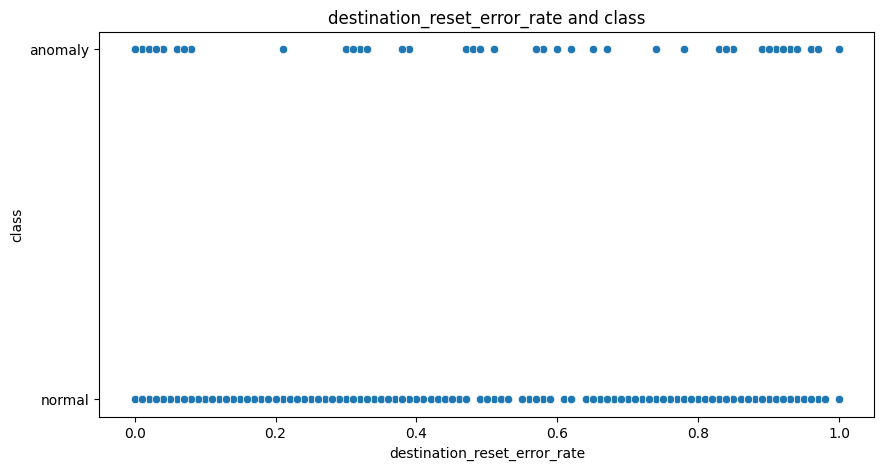

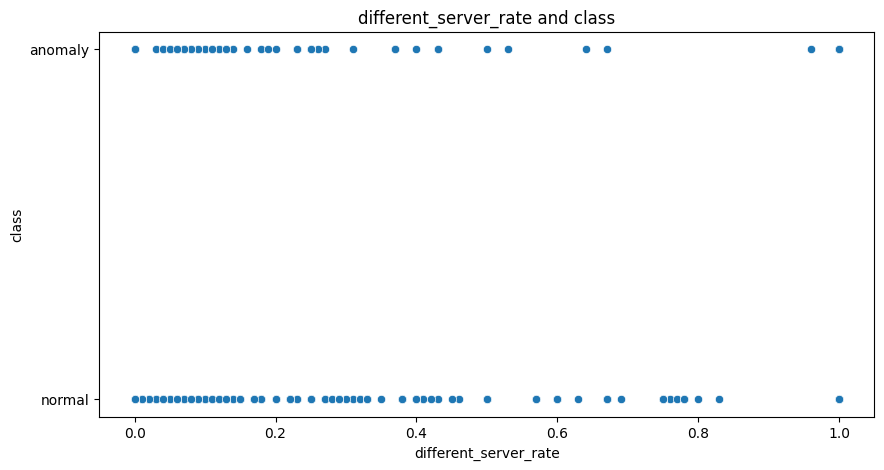

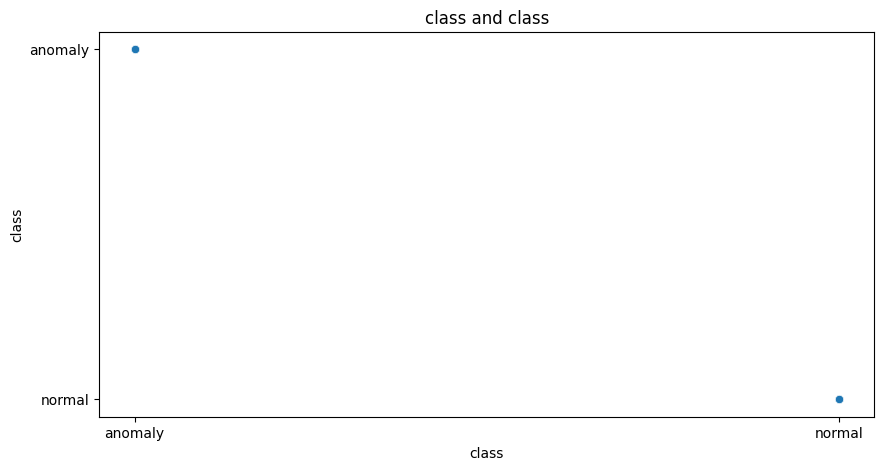

In [ ]:
# scatterplot for observing how each feature separates or relates to the target column
for column in df.columns:
  plt.figure(figsize=(10, 5))
  sns.scatterplot(x=df[column], y=df["class"])
  plt.title(f"{column} and class")
  plt.xlabel(column)
  plt.ylabel("class")
  plt.show()

In [ ]:
# transforming the categorical columns to numerical ones using the label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for column in categorical_data.columns:
    df.loc[:,column]=encoder.fit_transform(df[column])

In [ ]:
# creating a correlation matrix
matrix=df.corr()
matrix

,syn_error_rate,connection_time,destination_same_source_port_rate,destination_different_server_rate,connection_status,connection_count,destination_server_different_host_rate,suspicious_activity,protocol,server_different_host_rate,...,destination_server_reset_error_rate,server_reset_error_rate,server_syn_error_rate,destination_bytes,guest_login,authentication_status,destination_host_count,destination_reset_error_rate,different_server_rate,class
syn_error_rate,1.000000,-0.025722,-0.060082,0.037308,-0.337528,0.291691,-0.037862,-0.017207,-0.079886,-0.053885,...,-0.030593,-0.046146,0.960373,-0.001429,-0.024095,-0.205602,0.110198,-0.035989,0.041586,-0.655461
connection_time,-0.025722,1.000000,0.238938,0.366768,-0.035784,-0.051821,-0.019542,0.021545,0.123189,-0.056773,...,0.073712,0.085749,-0.025591,0.068087,-0.011370,-0.101420,0.063418,0.023716,0.080576,-0.022855
destination_same_source_port_rate,-0.060082,0.238938,1.000000,0.427771,-0.025143,-0.062627,0.186979,-0.027778,0.095265,-0.033871,...,0.048307,0.050899,-0.065100,-0.016364,-0.035108,-0.257843,-0.199762,0.061461,0.126341,-0.030709
destination_different_server_rate,0.037308,0.366768,0.427771,1.000000,-0.036469,-0.005647,-0.041857,0.035663,0.223494,-0.047520,...,0.038639,0.036189,0.032709,-0.006650,0.037855,-0.233882,0.088281,0.070973,0.286487,-0.119493
connection_status,-0.337528,-0.035784,-0.025143,-0.036469,1.000000,-0.130393,-0.208213,0.026119,0.109333,-0.023964,...,-0.816041,-0.892378,-0.338759,0.012889,0.027559,0.383928,0.120110,-0.806790,-0.035356,0.380204
connection_count,0.291691,-0.051821,-0.062627,-0.005647,-0.130393,1.000000,-0.135053,-0.040055,0.399387,-0.170749,...,0.018810,0.014167,0.288976,-0.022819,-0.046942,-0.461982,0.340381,0.015099,0.016517,-0.410791
destination_server_different_host_rate,-0.037862,-0.019542,0.186979,-0.041857,-0.208213,-0.135053,1.000000,-0.023176,-0.207234,0.057982,...,0.277205,0.224919,-0.035331,-0.003693,-0.027262,-0.055632,-0.365872,0.258163,-0.043483,-0.032599
suspicious_activity,-0.017207,0.021545,-0.027778,0.035663,0.026119,-0.040055,-0.023176,1.000000,-0.035422,-0.032615,...,-0.015096,-0.020291,-0.016191,0.004336,0.795499,0.064711,-0.002033,-0.010969,-0.000082,0.005336
protocol,-0.079886,0.123189,0.095265,0.223494,0.109333,0.399387,-0.207234,-0.035422,1.000000,-0.076526,...,-0.090146,-0.086478,-0.078789,-0.022524,-0.041379,-0.544624,0.297251,-0.084981,0.014572,0.107307
server_different_host_rate,-0.053885,-0.056773,-0.033871,-0.047520,-0.023964,-0.170749,0.057982,-0.032615,-0.076526,1.000000,...,0.043303,0.053474,-0.063632,-0.013051,-0.041144,0.101155,-0.137449,0.058123,-0.052602,0.048721


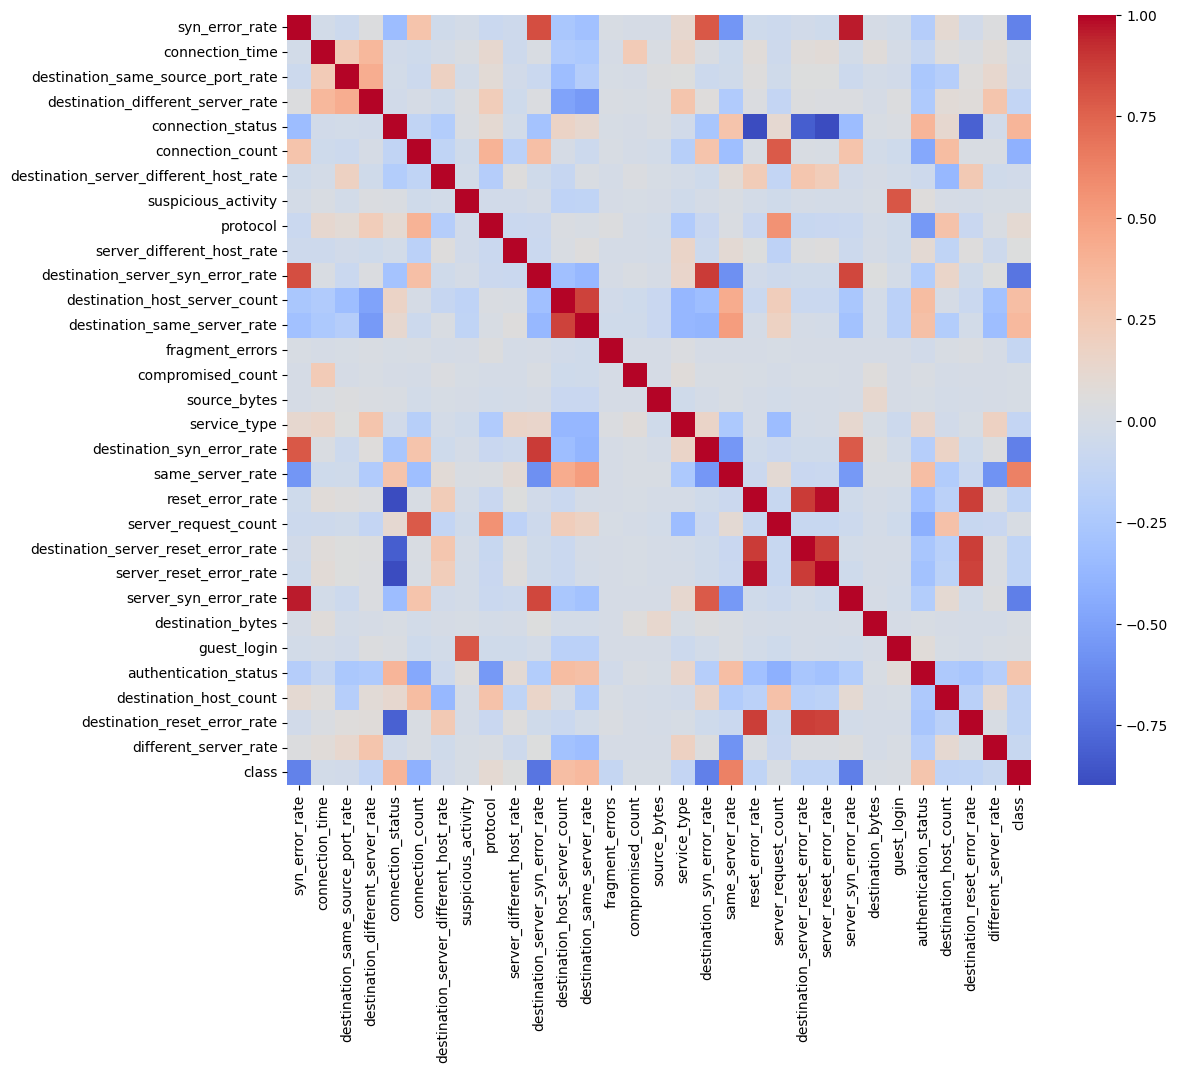

In [ ]:
# using a heatmap to visualize the correlation between all features
plt.figure(figsize=(12,10))
sns.heatmap(matrix, cmap='coolwarm')
plt.show()

In [ ]:
# splitting the data into X and Y
X=df.drop('class',axis=1)
Y=df['class'].astype(int)

In [ ]:
# Using a robust scaler to scale X and handle outliers
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaled_data=X.copy()
scaled_data[numerical_data.columns]=scaler.fit_transform(scaled_data[numerical_data.columns])
scaled_X=pd.DataFrame(scaled_data,columns=X.columns)
X=scaled_X
X

,syn_error_rate,connection_time,destination_same_source_port_rate,destination_different_server_rate,connection_status,connection_count,destination_server_different_host_rate,suspicious_activity,protocol,server_different_host_rate,...,server_request_count,destination_server_reset_error_rate,server_reset_error_rate,server_syn_error_rate,destination_bytes,guest_login,authentication_status,destination_host_count,destination_reset_error_rate,different_server_rate
0,0.0,0.0,0.000,0.0,9,-0.214286,0.000000,2.0,1,0.0,...,-0.2500,0.01,0.0,0.00,4.301525,0.0,0.0,-0.382075,0.01,0.00
1,1.0,0.0,-0.125,3.5,5,16.928571,0.000000,0.0,1,0.0,...,0.0000,0.00,0.0,1.00,-0.187070,0.0,-1.0,0.410377,0.00,0.07
2,1.0,0.0,-0.125,4.0,5,16.357143,0.000000,0.0,1,0.0,...,0.6250,0.00,0.0,1.00,-0.187070,0.0,-1.0,0.410377,0.00,0.06
3,1.0,0.0,-0.125,4.0,5,9.642857,0.000000,0.0,1,0.0,...,-0.3125,0.00,0.0,1.00,-0.187070,0.0,-1.0,0.410377,0.00,0.06
4,1.0,0.0,-0.125,3.5,5,8.642857,0.000000,0.0,1,0.0,...,0.3125,0.00,0.0,1.00,-0.187070,0.0,-1.0,0.410377,0.00,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14031,0.0,0.0,1.375,3.5,9,-0.285714,2.333333,0.0,1,0.0,...,-0.3125,0.00,0.0,0.00,-0.187070,0.0,-1.0,-0.518868,0.00,0.00
14032,0.0,0.0,-0.125,0.0,9,1.000000,0.000000,0.0,1,0.0,...,0.8125,0.00,0.0,0.00,1.155082,0.0,0.0,0.410377,0.00,0.00
14033,0.0,29.0,-0.125,1.0,9,-0.285714,0.000000,6.0,1,0.0,...,-0.3125,0.10,0.0,0.00,0.386827,1.0,0.0,0.410377,0.03,0.00
14034,0.0,1.0,0.875,8.5,9,-0.285714,0.000000,0.0,1,10.0,...,-0.1875,0.00,0.0,0.00,-0.007288,0.0,0.0,-0.735849,0.00,0.00


In [ ]:
# Using random forest to identify the top 20 most important features
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier()
randomforest.fit(X,Y)
importances=pd.Series(randomforest.feature_importances_,index=X.columns)
importances.sort_values(ascending=False).head(20)

,0
same_server_rate,0.111695
destination_server_syn_error_rate,0.109035
destination_syn_error_rate,0.098288
source_bytes,0.091359
connection_count,0.073730
connection_status,0.058783
syn_error_rate,0.055064
server_syn_error_rate,0.053402
different_server_rate,0.041139
destination_same_server_rate,0.031334


In [ ]:
# Selecting important features
important_features=importances.sort_values(ascending=False).head(20).index.tolist()
X=X[important_features]

In [ ]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
# Using SMOTE to address class imbalance
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train, y_train=smote.fit_resample(x_train, y_train)

Classification Models

In [ ]:
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,roc_auc_score,classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import VotingClassifier,BaggingClassifier,StackingClassifier

Decision Tree


[Text(0.5, 0.8333333333333334, 'destination_different_server_rate <= -0.817\ngini = 0.5\nsamples = 21534\nvalue = [10767, 10767]'),
 Text(0.25, 0.5, 'source_bytes <= -0.284\ngini = 0.132\nsamples = 10578\nvalue = [9828.0, 750.0]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.08\nsamples = 10225\nvalue = [9796, 429]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.165\nsamples = 353\nvalue = [32, 321]'),
 Text(0.75, 0.5, 'compromised_count <= 0.986\ngini = 0.157\nsamples = 10956\nvalue = [939.0, 10017.0]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.434\nsamples = 651\nvalue = [444.0, 207.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.091\nsamples = 10305\nvalue = [495, 9810]')]

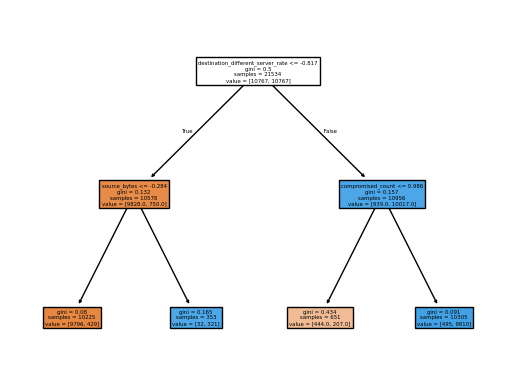

In [ ]:
treeModel = tree.DecisionTreeClassifier(max_depth=2 ,random_state=42)
treeModel.fit(x_train,y_train)
y_predForTree = treeModel.predict(x_test)
txtRep = tree.export_text(treeModel)
inputVariable = df.columns
tree.plot_tree(treeModel , feature_names= inputVariable , filled=True)

Decision tree accuracy measure

In [ ]:
print(f" Accuracy Score = {accuracy_score(y_test, y_predForTree)}")
print(f" Confusion Matrix = {confusion_matrix(y_test, y_predForTree)}")
print(f" Precision Score = {precision_score(y_test, y_predForTree, average='binary')}")
print(f" Recall Score = {recall_score(y_test, y_predForTree, average='binary')}")
print(f" F1 Score = {f1_score(y_test, y_predForTree, average='binary')}")
print(f" ROC Score = {roc_auc_score(y_test,y_predForTree,average = 'weighted')}")
print(f"Classification Report = {classification_report(y_test,y_predForTree)}")

 Accuracy Score = 0.9383903133903134
 Confusion Matrix = [[ 118    8]
 [ 165 2517]]
 Precision Score = 0.9968316831683168
 Recall Score = 0.9384787472035794
 F1 Score = 0.9667754945265988
 ROC Score = 0.937493341855758
Classification Report =               precision    recall  f1-score   support

           0       0.42      0.94      0.58       126
           1       1.00      0.94      0.97      2682

    accuracy                           0.94      2808
   macro avg       0.71      0.94      0.77      2808
weighted avg       0.97      0.94      0.95      2808



Sochastic Gradient Decent

In [ ]:
sgdModel = SGDClassifier()
sgdModel.fit(x_train,y_train)
y_predForSGD = sgdModel.predict(x_test)

Sochastic Gradient Decent accuracy measure

In [ ]:
print(f" Accuracy Score = {accuracy_score(y_test, y_predForSGD)}")
print(f" Confusion Matrix = {confusion_matrix(y_test, y_predForSGD)}")
print(f" Precision Score = {precision_score(y_test, y_predForSGD, average='binary')}")
print(f" Recall Score = {recall_score(y_test, y_predForSGD, average='binary')}")
print(f" F1 Score = {f1_score(y_test, y_predForSGD, average='binary')}")
print(f" ROC Score = {roc_auc_score(y_test,y_predForSGD,average = 'weighted')}")
print(f"Classification Report = {classification_report(y_test,y_predForSGD)}")

 Accuracy Score = 0.9262820512820513
 Confusion Matrix = [[ 112   14]
 [ 193 2489]]
 Precision Score = 0.9944067119456652
 Recall Score = 0.9280387770320656
 F1 Score = 0.9600771456123433
 ROC Score = 0.9084638329604773
Classification Report =               precision    recall  f1-score   support

           0       0.37      0.89      0.52       126
           1       0.99      0.93      0.96      2682

    accuracy                           0.93      2808
   macro avg       0.68      0.91      0.74      2808
weighted avg       0.97      0.93      0.94      2808



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy measure

In [ ]:
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 0.06445868945868946
MSE: 0.06445868945868946
RMSE: 0.25388715890861724
R-squared: -0.5039948865452226


In [ ]:
print(f" Accuracy Score = {accuracy_score(y_test, y_pred_lr)}")
print(f" Confusion Matrix =\n {confusion_matrix(y_test, y_pred_lr)}")
print(f" Precision Score = {precision_score(y_test, y_pred_lr, average='binary')}")
print(f" Recall Score = {recall_score(y_test, y_pred_lr, average='binary')}")
print(f" F1 Score = {f1_score(y_test, y_pred_lr, average='binary')}")
print(f" ROC Score = {roc_auc_score(y_test,y_pred_lr,average = 'weighted')}")

 Accuracy Score = 0.9355413105413105
 Confusion Matrix =
 [[ 118    8]
 [ 173 2509]]
 Precision Score = 0.9968216130313866
 Recall Score = 0.9354958985831469
 F1 Score = 0.9651856126178111
 ROC Score = 0.9360019175455417


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

KNN accuracy measure

In [ ]:
acc = accuracy_score(y_test, y_pred_knn)
cmatrix = confusion_matrix(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
roc_auc = roc_auc_score(y_test, y_pred_knn)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cmatrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9932336182336182
Confusion Matrix:
 [[ 122    4]
 [  15 2667]]
Precision: 0.9985024335454886
Recall: 0.9944071588366891
F1 Score: 0.996450588455072
ROC AUC Score: 0.9813305635453285


Ensambling

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('sgd', SGDClassifier(loss='log_loss')),
        ('dt', DecisionTreeClassifier())
    ],

    voting='soft'
)


voting_clf.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('sgd', SGDClassifier(loss='log_loss')),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [ ]:
y_pred_voting = voting_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_voting))

print("Classification Report: \n", classification_report(y_test, y_pred_voting))

Accuracy: 0.9960826210826211
Confusion Matrix: 
 [[ 122    4]
 [   7 2675]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       126
           1       1.00      1.00      1.00      2682

    accuracy                           1.00      2808
   macro avg       0.97      0.98      0.98      2808
weighted avg       1.00      1.00      1.00      2808

